# Data Description

In [199]:
import pandas as pd 
from pandas.plotting import parallel_coordinates
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
  
data = pd.read_csv("diabetes1.csv")

data.head(5)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0             35      0.0  33.6   
1            1     85.0           66.0             29      0.0  26.6   
2            8    183.0           64.0              0      0.0  23.3   
3            1     89.0           66.0             23     94.0  28.1   
4            0    137.0           40.0             35    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1

## Indept Data Description

In [132]:
# Data Shape
data.shape

(771, 9)

In [133]:
# Data Description
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   771.000000  770.000000     770.000000     771.000000  768.000000   
mean      3.818418  121.179221      69.748052      20.438392   80.029948   
std       3.355666   32.046319      27.045623      15.893061  116.332876   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   24.000000   
75%       6.000000  141.000000      80.000000      32.000000  126.000000   
max      17.000000  199.000000     472.000000      99.000000  846.000000   

               BMI  DiabetesPedigreeFunction         Age     Outcome  
count   771.000000                771.000000  770.000000  771.000000  
mean     35.440986                  0.471000   33.122078    0.347601  
std      98.206467                  0.330802   11.693336    0.476517  
min       0.000000                  0.078000   21.000000    0.000000  
25%      27.100000                  0.243500   24.000000    0.000000  
50%      32.000000                  0.368000   29.000000    0.000000  
75%      36.500000                  0.628000   40.000000    1.000000  
max    2750.000000                  2.420000   81.000000    1.000000

In [134]:
# Info on Abnormal Values
data.describe().T

count        mean         std     min      25%  \
Pregnancies               771.0    3.818418    3.355666   0.000   1.0000   
Glucose                   770.0  121.179221   32.046319   0.000  99.0000   
BloodPressure             770.0   69.748052   27.045623   0.000  62.0000   
SkinThickness             771.0   20.438392   15.893061   0.000   0.0000   
Insulin                   768.0   80.029948  116.332876   0.000   0.0000   
BMI                       771.0   35.440986   98.206467   0.000  27.1000   
DiabetesPedigreeFunction  771.0    0.471000    0.330802   0.078   0.2435   
Age                       770.0   33.122078   11.693336  21.000  24.0000   
Outcome                   771.0    0.347601    0.476517   0.000   0.0000   

                              50%      75%      max  
Pregnancies                 3.000    6.000    17.00  
Glucose                   117.000  141.000   199.00  
BloodPressure              72.000   80.000   472.00  
SkinThickness              23.000   32.000    99.00  
Insulin                    24.000  126.000   846.00  
BMI                        32.000   36.500  2750.00  
DiabetesPedigreeFunction    0.368    0.628     2.42  
Age                        29.000   40.000    81.00  
Outcome                     0.000    1.000     1.00

In [135]:
# Info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               771 non-null    int64  
 1   Glucose                   770 non-null    float64
 2   BloodPressure             770 non-null    float64
 3   SkinThickness             771 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       771 non-null    float64
 6   DiabetesPedigreeFunction  771 non-null    float64
 7   Age                       770 non-null    float64
 8   Outcome                   771 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.3 KB


In [136]:
# Check for duplicates
data.duplicated().sum()

np.int64(5)

In [137]:
# Note:
# - Glucose > 0
# - Blood Pressure > 0
# - Skin Thickness > 0
# - BMI > 0
# - Age > 0

# Check for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     1
BloodPressure               1
SkinThickness               0
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [138]:
# Check for 0 values
columns_to_check = ['Glucose', 'BloodPressure', 'Insulin', 'SkinThickness', 'BMI', 'Age']
zero_counts = data[columns_to_check].apply(lambda col: (col == 0).sum())
print(zero_counts)


Glucose            5
BloodPressure     37
Insulin          376
SkinThickness    228
BMI               11
Age                0
dtype: int64


In [139]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.122444       0.149337      -0.084709   
Glucose                      0.122444  1.000000       0.088065       0.053264   
BloodPressure                0.149337  0.088065       1.000000       0.188303   
SkinThickness               -0.084709  0.053264       0.188303       1.000000   
Insulin                     -0.089617  0.340357       0.037676       0.427375   
BMI                         -0.018023  0.045141      -0.077158      -0.014535   
DiabetesPedigreeFunction    -0.035889  0.146088       0.017106       0.185054   
Age                          0.544475  0.252427       0.197087      -0.117578   
Outcome                      0.227137  0.452962       0.053918       0.071253   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.089617 -0.018023                 -0.035889   
Glucose                   0.340357  0.045141                  0.146088   
BloodPressure             0.037676 -0.077158                  0.017106   
SkinThickness             0.427375 -0.014535                  0.185054   
Insulin                   1.000000 -0.009544                  0.189477   
BMI                      -0.009544  1.000000                 -0.013727   
DiabetesPedigreeFunction  0.189477 -0.013727                  1.000000   
Age                      -0.054184 -0.012476                  0.038149   
Outcome                   0.117818  0.072746                  0.171227   

                               Age   Outcome  
Pregnancies               0.544475  0.227137  
Glucose                   0.252427  0.452962  
BloodPressure             0.197087  0.053918  
SkinThickness            -0.117578  0.071253  
Insulin                  -0.054184  0.117818  
BMI                      -0.012476  0.072746  
DiabetesPedigreeFunction  0.038149  0.171227  
Age                       1.000000  0.241777  
Outcome                   0.241777  1.000000

# Data Preperation

## Impute Data


### Cleaning Data

In [140]:
# Copy the original data set
data_copy = data.copy()

# Identify all row that are duplicates and only keeping the first row
data_cleaned = data_copy.drop_duplicates(keep='first')

# Find all duplicate rows (keeps first occurrence, marks rest as duplicates)
duplicate_mask = data.duplicated(keep='first')
deleted_row_numbers = data[duplicate_mask].index.tolist()

print(f"Deleted row numbers: {deleted_row_numbers}")
print(f"Number of deleted rows: {len(deleted_row_numbers)}")

Deleted row numbers: [532, 707, 716, 718, 770]
Number of deleted rows: 5


In [141]:
outlier_summary = {}

for col in ['BloodPressure', 'BMI', ]:
    if data_cleaned[col].notna().sum() > 0:
        # Z-score method (conservative for medical data)
        z_scores = np.abs(stats.zscore(data_cleaned[col].dropna()))
        z_outliers = z_scores > 3
        
        outlier_summary[col] = {
            'z_score_outliers': z_outliers.sum(),
            'range': f"{data_cleaned[col].min():.1f} - {data_cleaned[col].max():.1f}"
        }
        
        print(f"{col}: Z-score outliers: {z_outliers.sum()}")

BloodPressure: Z-score outliers: 2
BMI: Z-score outliers: 1


In [142]:
# Set invalid / incorrect values to NaN
invalid_zero_col = ['Glucose', 'BloodPressure', 'BMI']
data_cleaned.loc[:, invalid_zero_col] = data_cleaned.loc[:, invalid_zero_col].replace(0, np.nan)

In [143]:
# Standardized dataframe
scaler = StandardScaler()

data_scaled = pd.DataFrame(
    scaler.fit_transform(data_cleaned), 
    columns=data_cleaned.columns, 
    index=data_cleaned.index
)

In [ ]:
# Setting Outliers in BMI and BloodPressure to NaN
data_no_outlier = data_scaled.copy()

for col in ['BloodPressure', 'BMI']:
    outlier_mask = np.abs(data_no_outlier[col]) > 3
    
    data_no_outlier.loc[outlier_mask, col] = np.nan

    print(f"{col}: Changed at {data_no_outlier[outlier_mask].index.tolist()}")

BloodPressure: Changed at [176, 556]
BMI: Changed at [668]


### Relationship between Columns

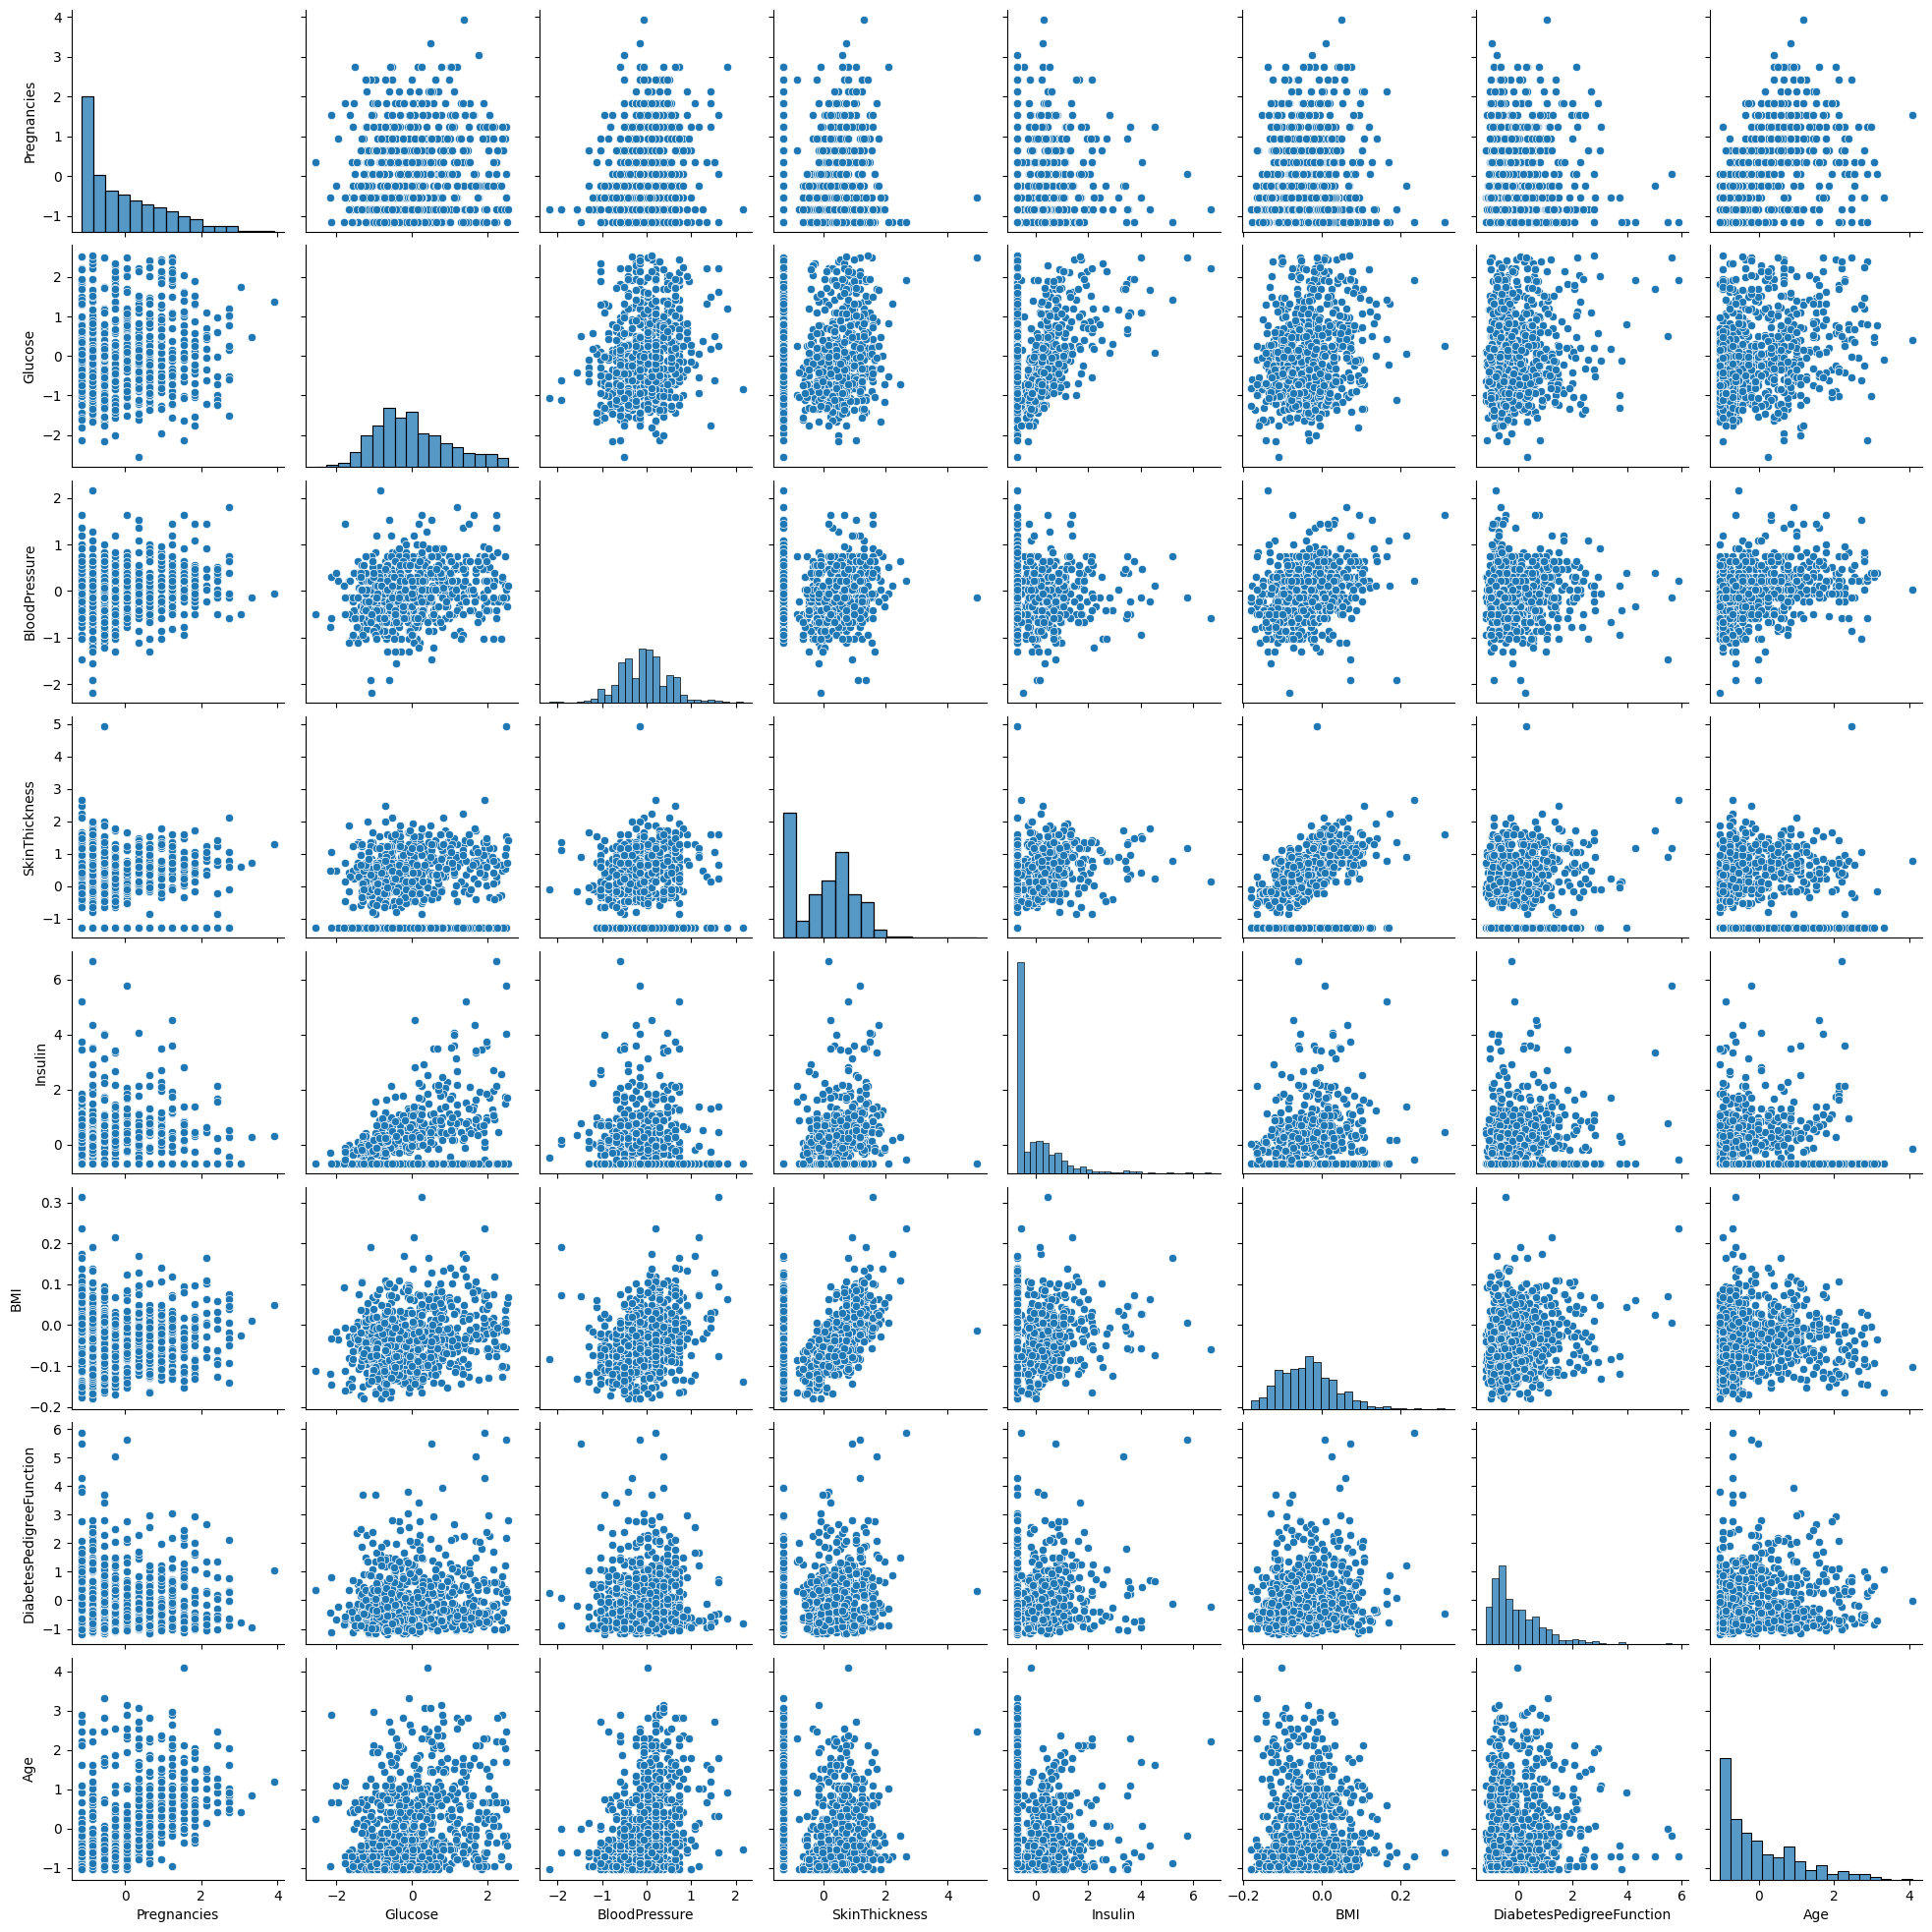

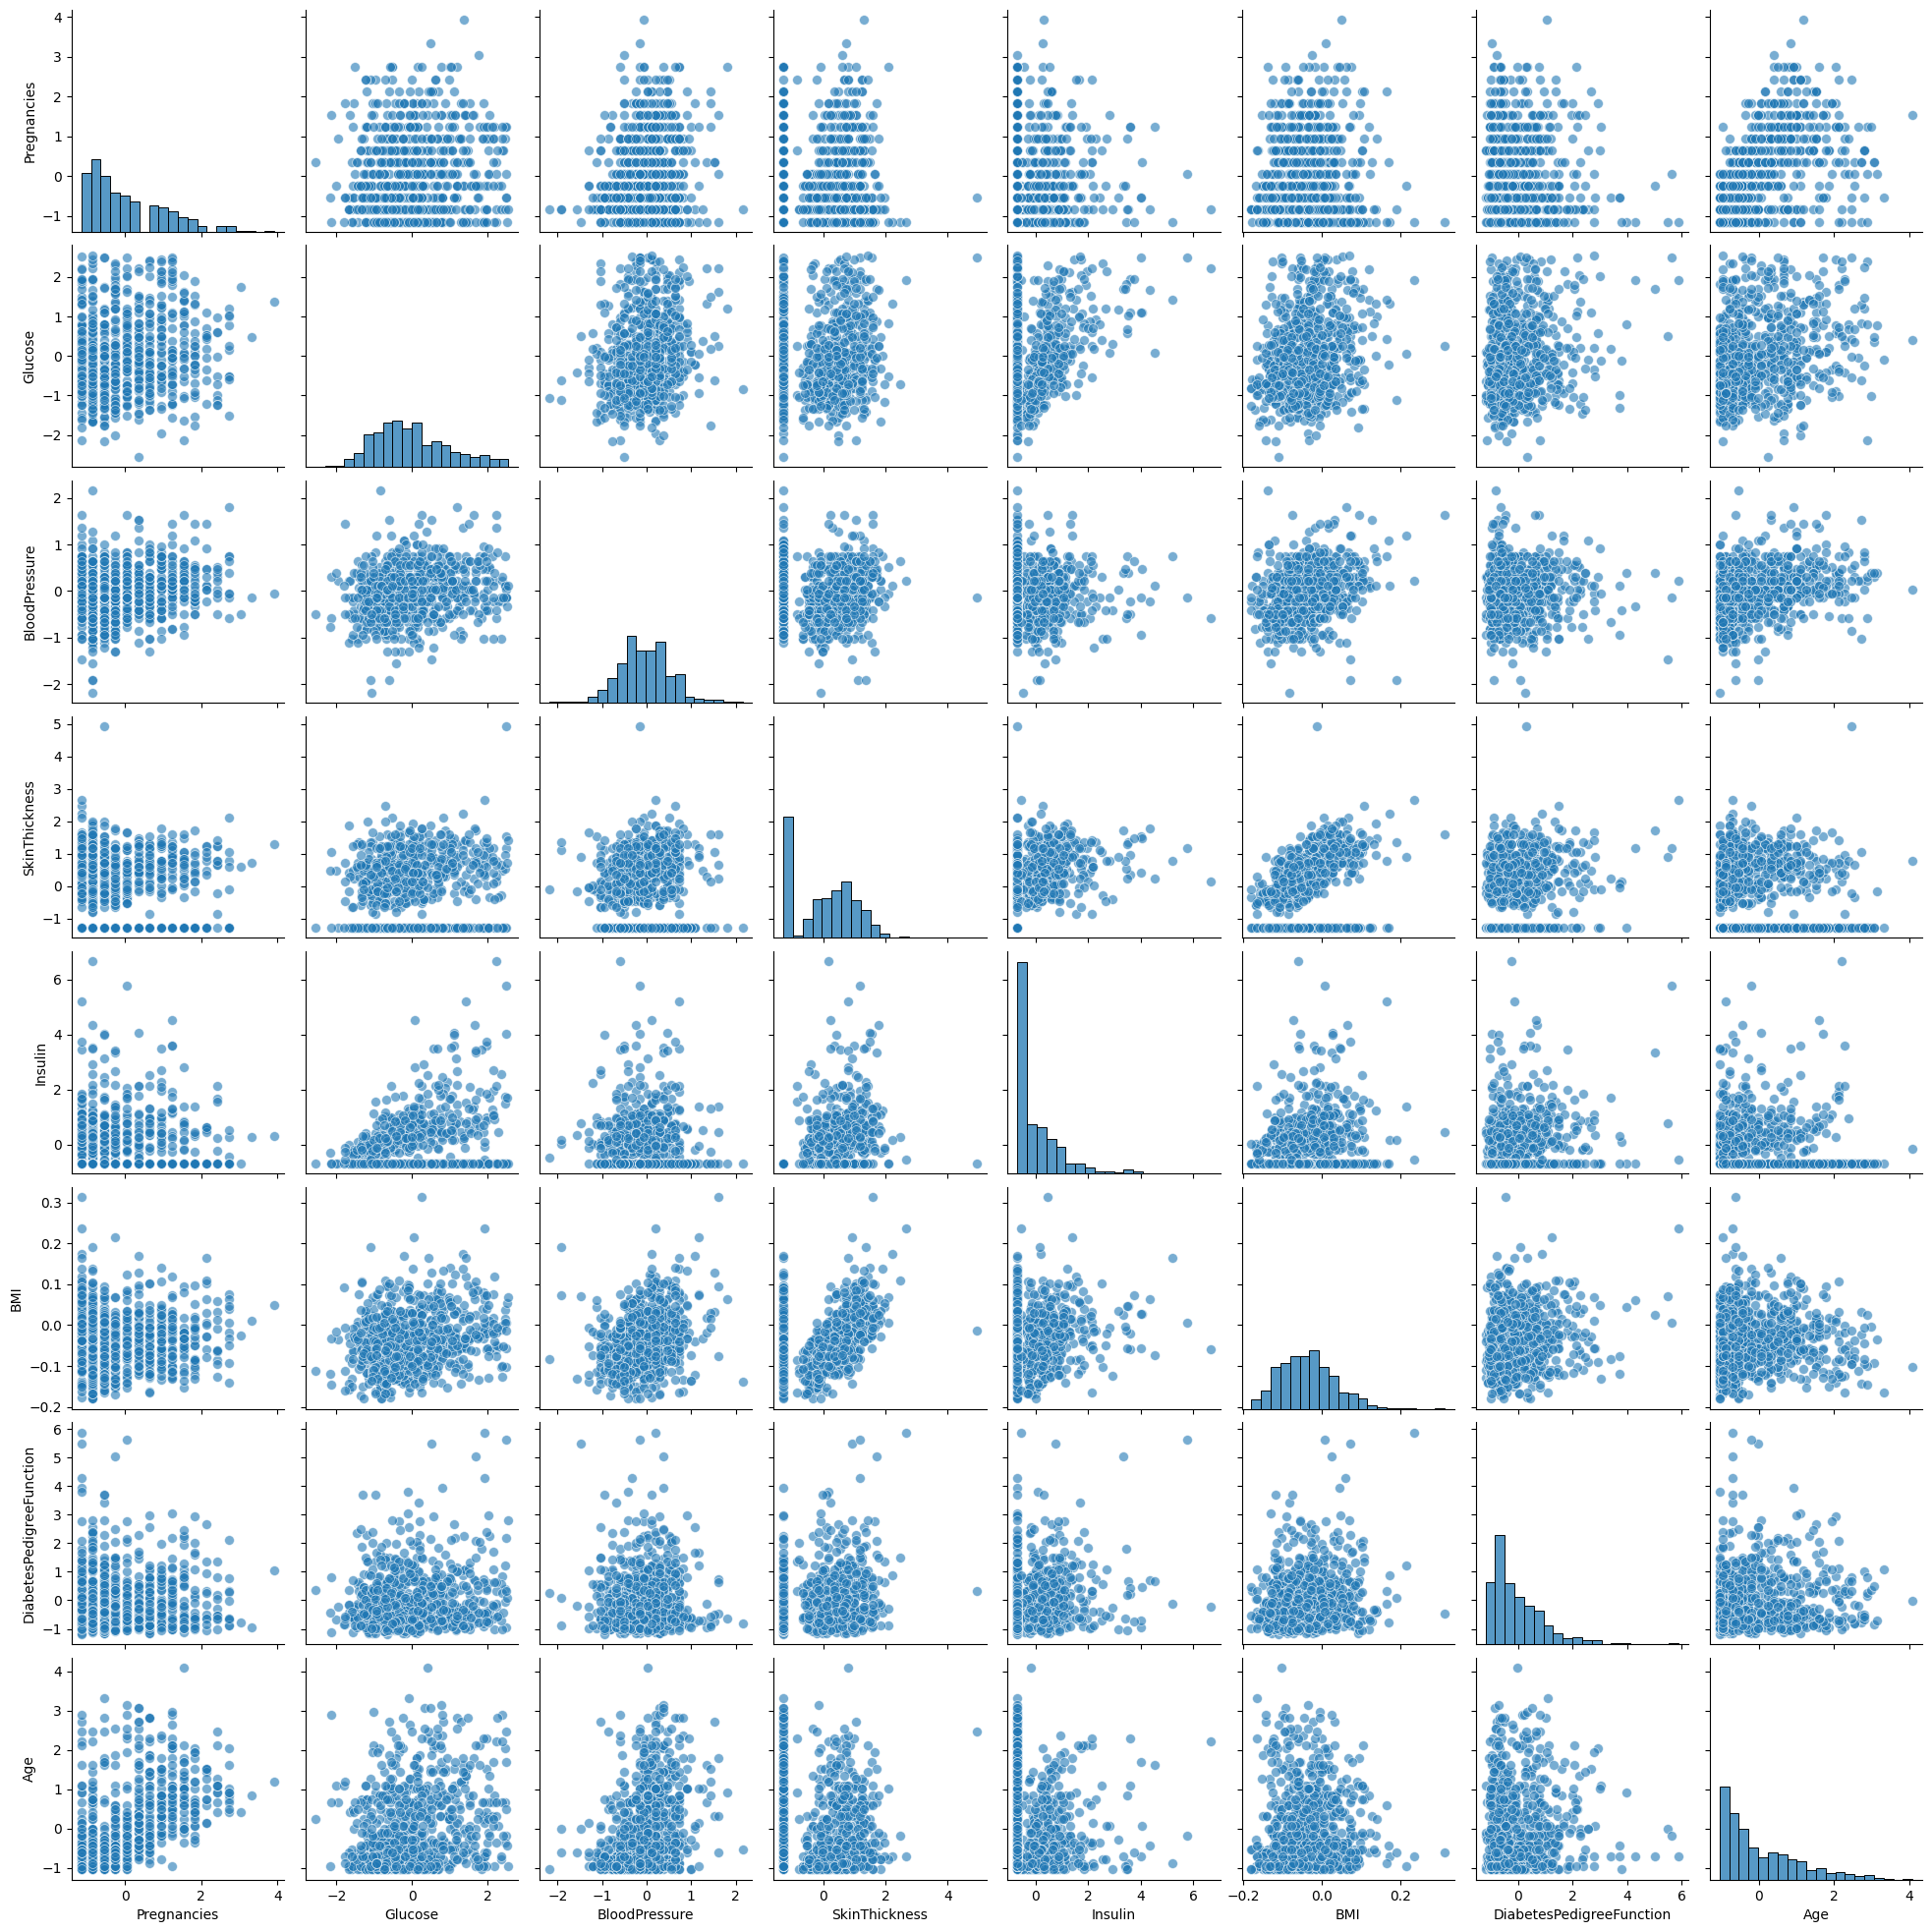

In [145]:
# After removing Outliers' Visualisation
data_no_outlier_visualise = data_no_outlier.drop(columns=['Outcome'])
sns.pairplot(data_no_outlier_visualise)
plt.show()

# More customized pairplot
sns.pairplot(data_no_outlier_visualise, 
             diag_kind='hist',  # diagonal plots
             plot_kws={'alpha': 0.6, 's': 50},  # scatter plot options
             diag_kws={'bins': 20})  # histogram options
plt.show()


## Imputation

### MICE for Imputation without Outlier

In [146]:
# MICE imputer on standardized data without Outlier
MICE_imputer = IterativeImputer(
    random_state=42,
    max_iter=15,
    tol=1e-4,
    imputation_order='ascending'
)

data_MICE_complete = pd.DataFrame(
    MICE_imputer.fit_transform(data_no_outlier),
    columns=data_no_outlier.columns,
    index=data_no_outlier.index
)

### MICE for Imputation with Outlier

In [147]:
# MICE imputer on standardized data
data_MICE_outlier_complete = pd.DataFrame(
    MICE_imputer.fit_transform(data_scaled),
    columns=data_scaled.columns,
    index=data_scaled.index
)

### RandomForestRegressor for Imputation without Outlier

In [148]:
# RandomForest imputer on standardized data without Outlier
rf_imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=225,
        random_state=42,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=1,
    ),
    random_state=42,
    max_iter=20,
    tol=1e-4,
    imputation_order='ascending'
)

data_RF_complete = pd.DataFrame(
    rf_imputer.fit_transform(data_no_outlier),
    columns=data_scaled.columns,
    index=data_scaled.index
)

### RandomForestRegressor for Imputation with Outlier

In [149]:
# RandomForest imputer on standardized data
data_RF_outlier_complete = pd.DataFrame(
    rf_imputer.fit_transform(data_scaled),
    columns=data_scaled.columns,
    index=data_scaled.index
)

### ExtraTreeRegressor for Imputation without Outlier

In [150]:
# ExtraTree imputer on standardized data without Outlier
et_imputer = IterativeImputer(
    estimator=ExtraTreesRegressor(
        n_estimators=225, 
        random_state=42,
        max_depth=20,
        min_samples_split=5,
    ),
    random_state=42,
    max_iter=45,
    tol=1e-4,
    imputation_order='ascending'
)

data_ET_complete = pd.DataFrame(
    et_imputer.fit_transform(data_no_outlier),
    columns=data_no_outlier.columns,
    index=data_no_outlier.index
)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


### ExtraTreeRegressor for Imputation with Outlier

In [ ]:
# ExtraTree imputer on standardized data with Outlier
data_ET_outlier_complete = pd.DataFrame(
    et_imputer.fit_transform(data_scaled),
    columns=data_scaled.columns,
    index=data_scaled.index
)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Validation

### cross_val_score Validation

In [153]:
# Define classifier
classifier = RandomForestClassifier(random_state=42)

# Separate features and target for both imputation methods
# MICE imputed data
X_MICE = data_MICE_complete.drop(columns=['Outcome'])
y_MICE = data_MICE_complete['Outcome']

X_MICE_Outlier = data_MICE_outlier_complete.drop(columns=['Outcome'])
y_MICE_Outlier = data_MICE_outlier_complete['Outcome']

# Random Forest imputed data
X_RF = data_RF_complete.drop(columns=['Outcome'])
y_RF = data_RF_complete['Outcome']

X_RF_Outlier = data_RF_outlier_complete.drop(columns=['Outcome'])
y_RF_Outlier = data_RF_outlier_complete['Outcome']

# Extra Tree imputed data
X_ET = data_ET_complete.drop(columns=['Outcome'])
y_ET = data_ET_complete['Outcome']

X_ET_Outlier = data_ET_outlier_complete.drop(columns=['Outcome'])
y_ET_Outlier = data_ET_outlier_complete['Outcome']


# Convert to binary (you already did this correctly)
y_MICE_binary = (y_MICE > 0.5).astype(int)
y_MICE_Outlier_binary = (y_MICE_Outlier > 0.5).astype(int)
y_RF_binary = (y_RF > 0.5).astype(int)
y_RF_Outlier_binary = (y_RF_Outlier > 0.5).astype(int)
y_ET_binary = (y_ET > 0.5).astype(int)
y_ET_Outlier_binary = (y_ET_Outlier > 0.5).astype(int)

# Cross-validation comparison - USE THE BINARY VERSIONS!
mice_scores = cross_val_score(classifier, X_MICE, y_MICE_binary, cv=5, scoring='accuracy')
mice_outlier_scores = cross_val_score(classifier, X_MICE_Outlier, y_MICE_Outlier_binary, cv=5, scoring='accuracy')
rf_scores = cross_val_score(classifier, X_RF, y_RF_binary, cv=5, scoring='accuracy')
rf_outlier_scores = cross_val_score(classifier, X_RF_Outlier, y_RF_Outlier_binary, cv=5, scoring='accuracy')
et_scores = cross_val_score(classifier, X_ET, y_ET_binary, cv=5, scoring='accuracy')
et_outlier_scores = cross_val_score(classifier, X_ET_Outlier, y_ET_Outlier_binary, cv=5, scoring='accuracy')

# Display results
results = {
    'MICE': mice_scores,
    'MICE_Outlier': mice_outlier_scores,
    'RF': rf_scores,
    'RF_Outlier': rf_outlier_scores,
    'ET': et_scores,
    'ET_Outlier': et_outlier_scores
}

# Print results
for name, scores in results.items():
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Rank all models by accuracy
ranked_models = sorted(results.items(), key=lambda x: x[1].mean(), reverse=True)

print("\nRanked Models (Best to Worst):")
for i, (name, scores) in enumerate(ranked_models, 1):
    print(f"{i}. {name}: {scores.mean():.4f} ± {scores.std():.4f}")

print(f"\nMost Accurate Model: {ranked_models[0][0]}")
    

MICE: 0.7637 ± 0.0250
MICE_Outlier: 0.7650 ± 0.0353
RF: 0.7585 ± 0.0277
RF_Outlier: 0.7533 ± 0.0361
ET: 0.7585 ± 0.0296
ET_Outlier: 0.7637 ± 0.0334

Ranked Models (Best to Worst):
1. MICE_Outlier: 0.7650 ± 0.0353
2. ET_Outlier: 0.7637 ± 0.0334
3. MICE: 0.7637 ± 0.0250
4. ET: 0.7585 ± 0.0296
5. RF: 0.7585 ± 0.0277
6. RF_Outlier: 0.7533 ± 0.0361

Most Accurate Model: MICE_Outlier


### cross_validate Validation

In [154]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

mice_results = cross_validate(classifier, X_MICE, y_MICE_binary, cv=5, scoring=scoring)
mice_outlier_results = cross_validate(classifier, X_MICE_Outlier, y_MICE_Outlier_binary, cv=5,scoring=scoring)
rf_results = cross_validate(classifier, X_RF, y_RF_binary, cv=5, scoring=scoring)
rf_outlier_results = cross_validate(classifier, X_RF_Outlier, y_RF_Outlier_binary, cv=5, scoring=scoring)
et_results = cross_validate(classifier, X_ET, y_ET_binary, cv=5, scoring=scoring)
et_outlier_results = cross_validate(classifier, X_ET_Outlier, y_ET_Outlier_binary, cv=5, scoring=scoring)

for metric in scoring:
    print(f"\n{metric.upper()}:")
    
    # Create results dictionary for this metric
    metric_results = {
        'MICE': mice_results[f'test_{metric}'],
        'MICE_Outlier': mice_outlier_results[f'test_{metric}'],
        'RF': rf_results[f'test_{metric}'],
        'RF_Outlier': rf_outlier_results[f'test_{metric}'],
        'ET': et_results[f'test_{metric}'],
        'ET_Outlier': et_outlier_results[f'test_{metric}']
    }
    
    # Print results with correct labels
    for name, scores in metric_results.items():
        print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")
    
    # Find the most accurate model for this metric
    best_model = max(metric_results.keys(), key=lambda x: metric_results[x].mean())
    best_score = metric_results[best_model].mean()
    best_std = metric_results[best_model].std()
    
    print(f"\nBest Model for {metric.upper()}: {best_model}")
    print(f"Best Score: {best_score:.4f} ± {best_std:.4f}")
    
    # Optional: Show ranked performance
    ranked_models = sorted(metric_results.items(), key=lambda x: x[1].mean(), reverse=True)
    print(f"Ranking: {' > '.join([f'{name} ({scores.mean():.4f})' for name, scores in ranked_models])}")


ACCURACY:
MICE: 0.7637 ± 0.0250
MICE_Outlier: 0.7650 ± 0.0353
RF: 0.7585 ± 0.0277
RF_Outlier: 0.7533 ± 0.0361
ET: 0.7585 ± 0.0296
ET_Outlier: 0.7637 ± 0.0334

Best Model for ACCURACY: MICE_Outlier
Best Score: 0.7650 ± 0.0353
Ranking: MICE_Outlier (0.7650) > ET_Outlier (0.7637) > MICE (0.7637) > ET (0.7585) > RF (0.7585) > RF_Outlier (0.7533)

PRECISION:
MICE: 0.6902 ± 0.0537
MICE_Outlier: 0.6975 ± 0.0752
RF: 0.6816 ± 0.0502
RF_Outlier: 0.6766 ± 0.0673
ET: 0.6796 ± 0.0561
ET_Outlier: 0.6959 ± 0.0690

Best Model for PRECISION: MICE_Outlier
Best Score: 0.6975 ± 0.0752
Ranking: MICE_Outlier (0.6975) > ET_Outlier (0.6959) > MICE (0.6902) > RF (0.6816) > ET (0.6796) > RF_Outlier (0.6766)

RECALL:
MICE: 0.5952 ± 0.0532
MICE_Outlier: 0.5916 ± 0.0415
RF: 0.5841 ± 0.0546
RF_Outlier: 0.5767 ± 0.0622
ET: 0.5878 ± 0.0626
ET_Outlier: 0.5879 ± 0.0547

Best Model for RECALL: MICE
Best Score: 0.5952 ± 0.0532
Ranking: MICE (0.5952) > MICE_Outlier (0.5916) > ET_Outlier (0.5879) > ET (0.5878) > RF (0.584

# Data Visualisation

In [174]:
# Take MICE_Outlier for data visualisation
data_map = {
    'MICE': data_MICE_complete,
    'MICE_Outlier': data_MICE_outlier_complete,
    'RF': data_RF_complete,
    'RF_Outlier': data_RF_outlier_complete,
    'ET': data_ET_complete,
    'ET_Outlier': data_ET_outlier_complete
}

# Step 2: Get the name of the best-performing model
best_model_name = ranked_models[0][0]

# Step 3: Get the corresponding imputed dataframe
best_imputed_data = data_map[best_model_name]

data_visualised = pd.DataFrame(
    scaler.inverse_transform(best_imputed_data),
    columns=best_imputed_data.columns,
    index=best_imputed_data.index
)

data_visualised.head(5) 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0          6.0  147.897240      71.982506           35.0   -0.044054   
1          1.0   85.062916      66.118256           29.0   -0.044054   
2          8.0  182.805198      64.163506            0.0   -0.044054   
3          1.0   89.052397      66.118256           23.0   93.816230   
4          0.0  136.926168      40.706505           35.0  167.706240   

         BMI  DiabetesPedigreeFunction        Age  Outcome  
0  33.615090                     0.627  49.994937      1.0  
1  26.665530                     0.351  31.006105      0.0  
2  23.389309                     0.672  32.005517      1.0  
3  28.154721                     0.167  21.011983      0.0  
4  43.046635                     2.288  33.004929      1.0

## Data Description after Cleaning

In [157]:
data_visualised.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   766.000000  766.000000     766.000000     766.000000  766.000000   
mean      3.832898  121.628346      73.293717      20.480418   78.944527   
std       3.360013   30.319135      22.093428      15.925858  115.265410   
min       0.000000   44.000000      24.000000       0.000000   -2.513764   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   23.000000   
75%       6.000000  140.750000      80.000000      32.000000  125.000000   
max      17.000000  199.000000     472.000000      99.000000  846.000000   

               BMI  DiabetesPedigreeFunction         Age     Outcome  
count   766.000000                766.000000  766.000000  766.000000  
mean     36.015811                  0.470634   33.178683    0.348564  
std      98.430704                  0.331421   11.698362    0.476827  
min      18.200000                  0.078000   21.000000    0.000000  
25%      27.500000                  0.243250   24.000000    0.000000  
50%      32.400000                  0.368000   29.000000    0.000000  
75%      36.600000                  0.625500   40.000000    1.000000  
max    2750.000000                  2.420000   81.000000    1.000000

In [158]:
data_visualised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 0 to 769
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    float64
 1   Glucose                   766 non-null    float64
 2   BloodPressure             766 non-null    float64
 3   SkinThickness             766 non-null    float64
 4   Insulin                   766 non-null    float64
 5   BMI                       766 non-null    float64
 6   DiabetesPedigreeFunction  766 non-null    float64
 7   Age                       766 non-null    float64
 8   Outcome                   766 non-null    float64
dtypes: float64(9)
memory usage: 59.8 KB


In [159]:
# Verify there is no null
data_visualised.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [160]:
# Verify there is no 0 values for BMI and Blood Pressure
columns_to_check = ['BloodPressure', 'BMI']
zero_counts = data_visualised[columns_to_check].apply(lambda col: (col == 0).sum())
print(zero_counts)

BloodPressure    0
BMI              0
dtype: int64


## Outlier removal for better visualisation

In [206]:
# Remove Outlier from BloodPressure and BMI for better visualisation
data_visualised_scaled = pd.DataFrame(
    scaler.fit_transform(data_visualised), 
    columns=data_visualised.columns, 
    index=data_visualised.index
)

data_visualised_no_outlier = data_visualised_scaled.copy()

data_visualised_no_outlier['BloodPressure'] = np.clip(data_visualised_no_outlier['BloodPressure'], -3, 3)
data_visualised_no_outlier['BMI'] = np.clip(data_visualised_no_outlier['BMI'], -3, 3)

# Remove Standardisation
data_visualised_no_outlier = pd.DataFrame(
    scaler.inverse_transform(data_visualised_no_outlier),
    columns=data_visualised_no_outlier.columns,
    index=data_visualised_no_outlier.index
)

# Remove column ['Outcome']
data_visualised_no_outlier_no_outcome = data_visualised_no_outlier.drop('Outcome', axis=1).copy()

data_visualised_no_outlier.describe().T

count        mean         std        min        25%  \
Pregnancies               766.0    3.832898    3.360013   0.000000   1.000000   
Glucose                   766.0  121.594937   30.239402  44.170736  99.026099   
BloodPressure             766.0   72.503155   12.366608  25.068504  64.163506   
SkinThickness             766.0   20.480418   15.925858   0.000000   0.000000   
Insulin                   766.0   78.783135  115.094086  -2.554082  -0.044054   
BMI                       766.0   32.878434   12.716839  18.326058  27.559045   
DiabetesPedigreeFunction  766.0    0.470634    0.331421   0.078000   0.243250   
Age                       766.0   33.183508   11.691486  21.011983  24.010219   
Outcome                   766.0    0.348564    0.476827   0.000000   0.000000   

                                 50%         75%         max  
Pregnancies                 3.000000    6.000000   17.000000  
Glucose                   116.978763  140.666306  198.763122  
BloodPressure              71.982506   79.801507  137.985350  
SkinThickness              23.000000   32.000000   99.000000  
Insulin                    22.921760  124.770153  844.698498  
BMI                        32.423736   36.593472  328.986383  
DiabetesPedigreeFunction    0.368000    0.625500    2.420000  
Age                        29.007281   40.000815   80.976716  
Outcome                     0.000000    1.000000    1.000000

## Univariate Analysis

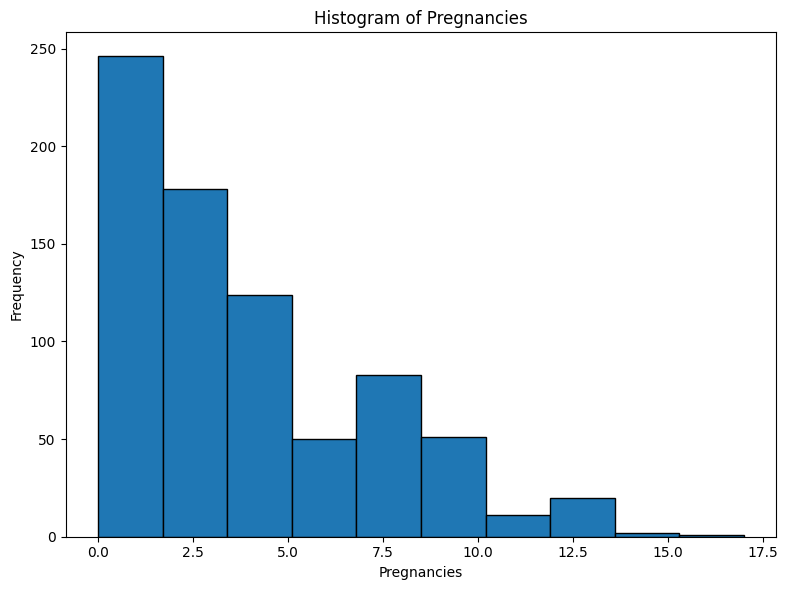

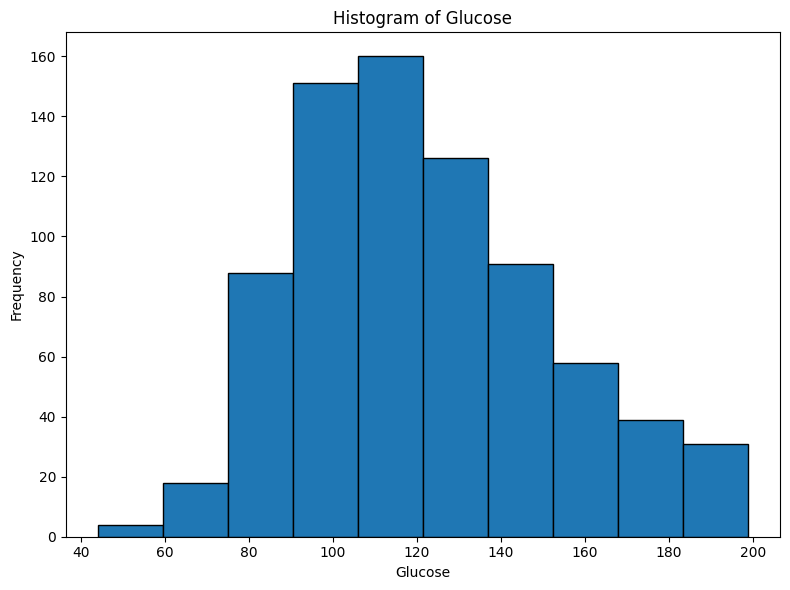

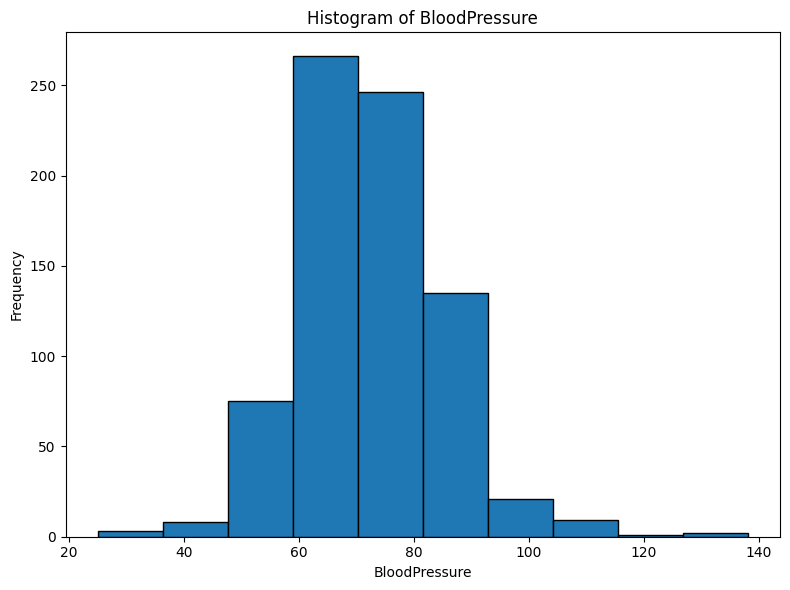

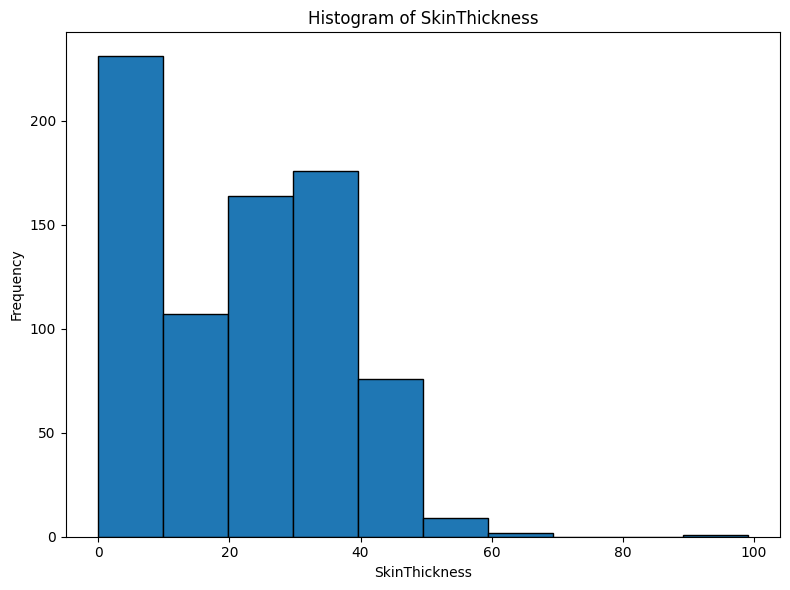

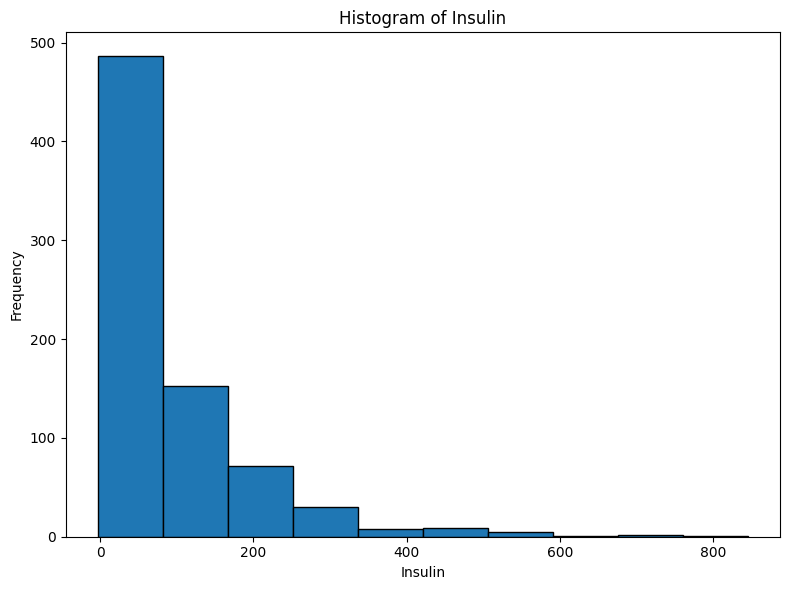

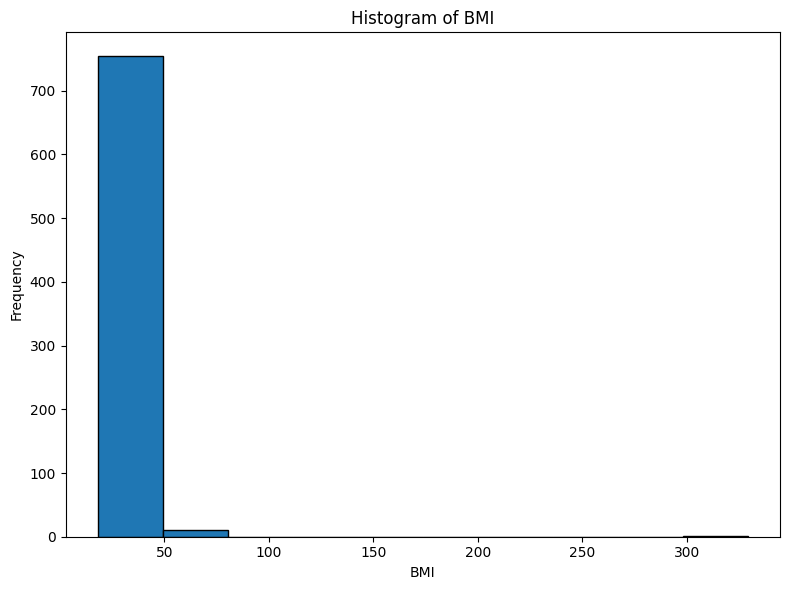

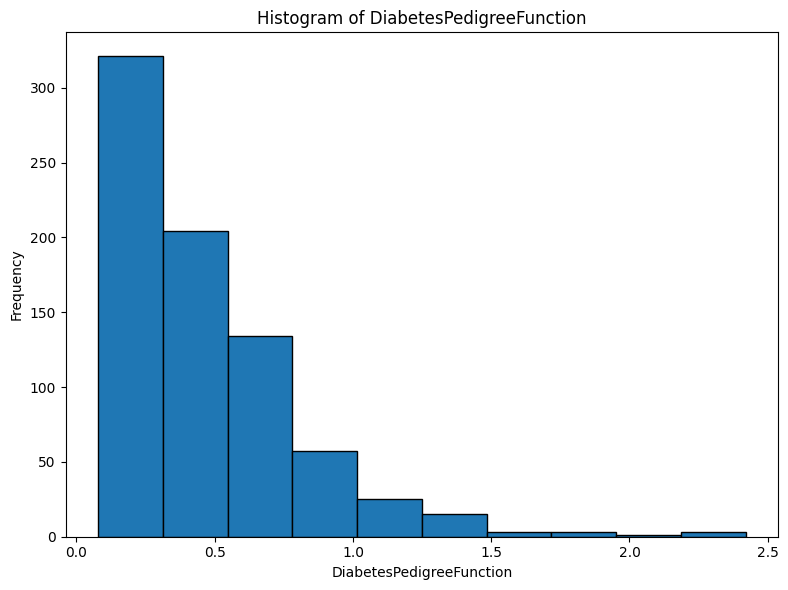

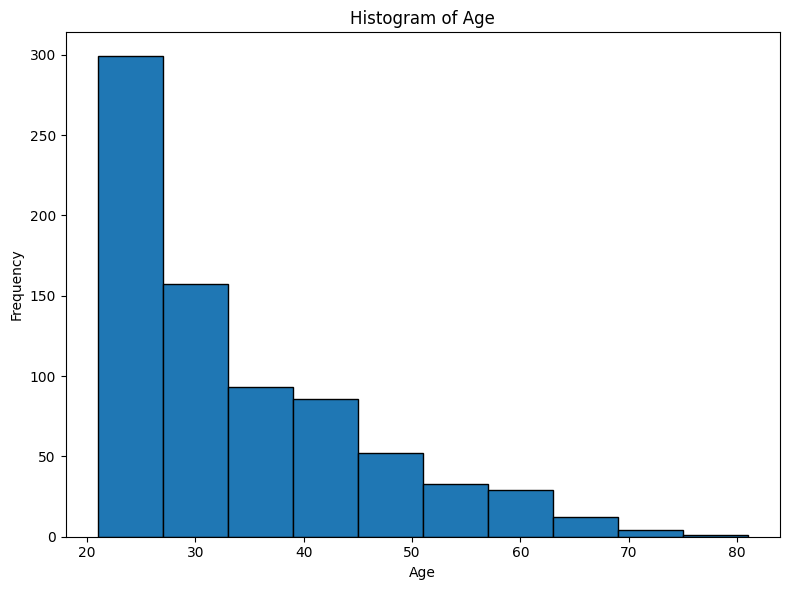

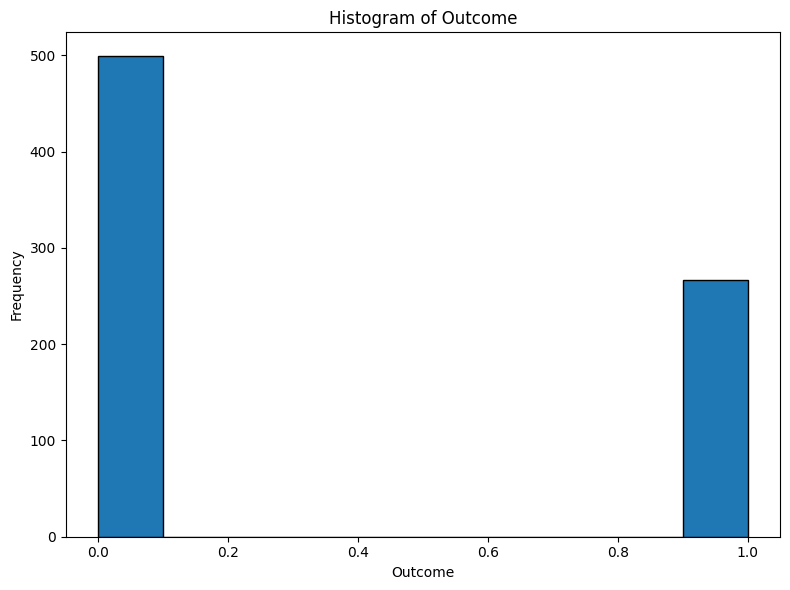

In [187]:
# Histogram
for column in data_visualised_no_outlier.columns:
    plt.figure(figsize=(8, 6))
    data_visualised_no_outlier[column].hist(edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()



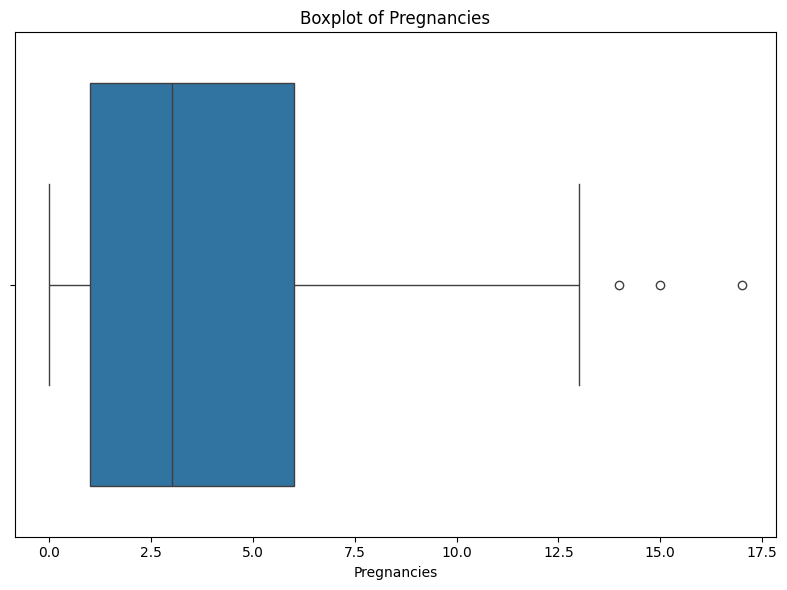

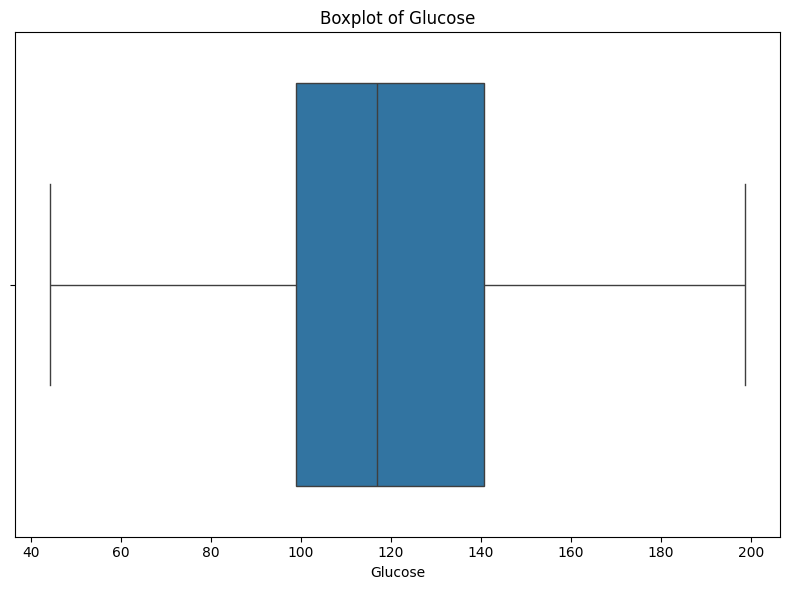

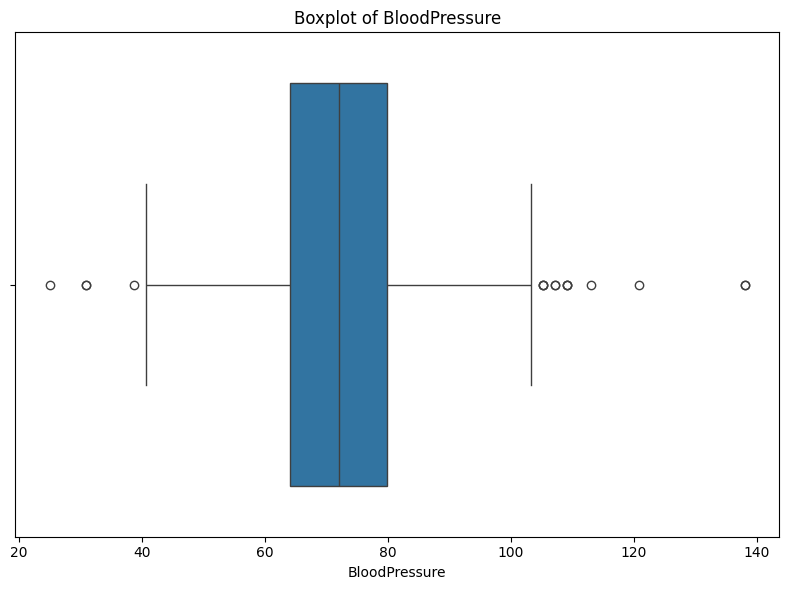

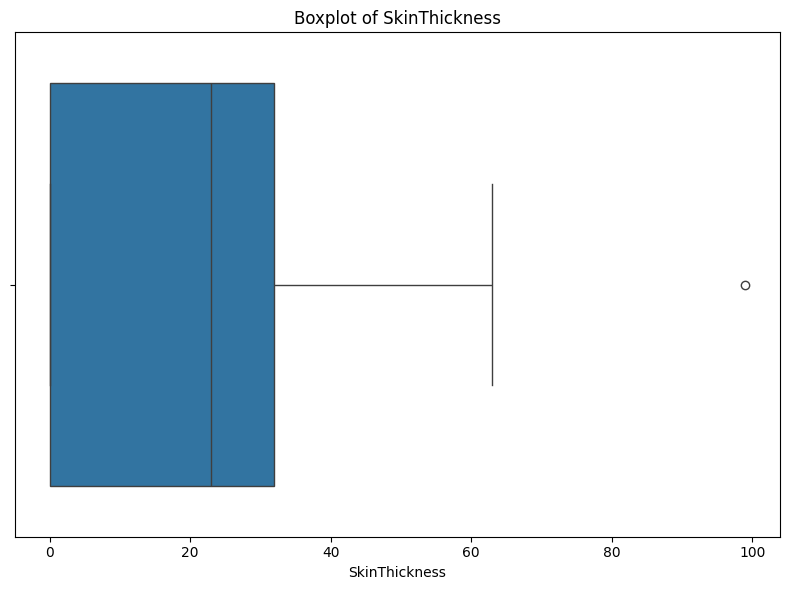

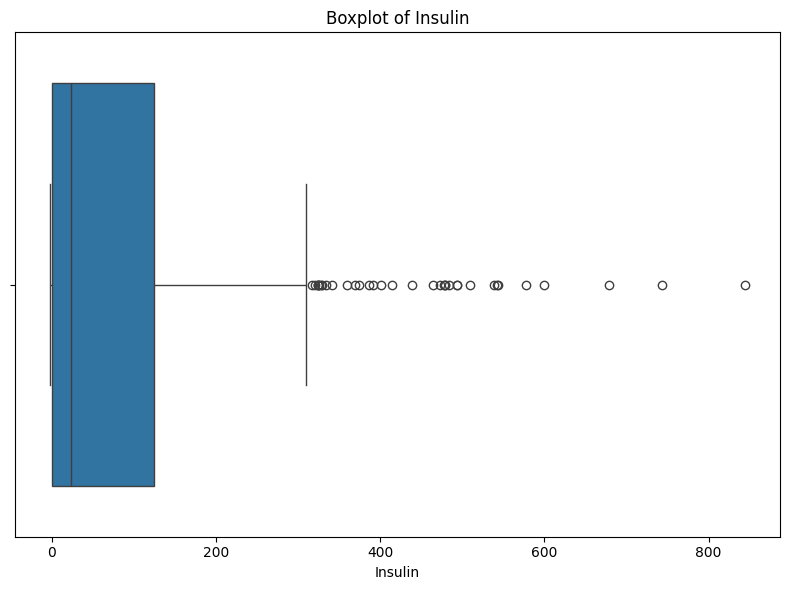

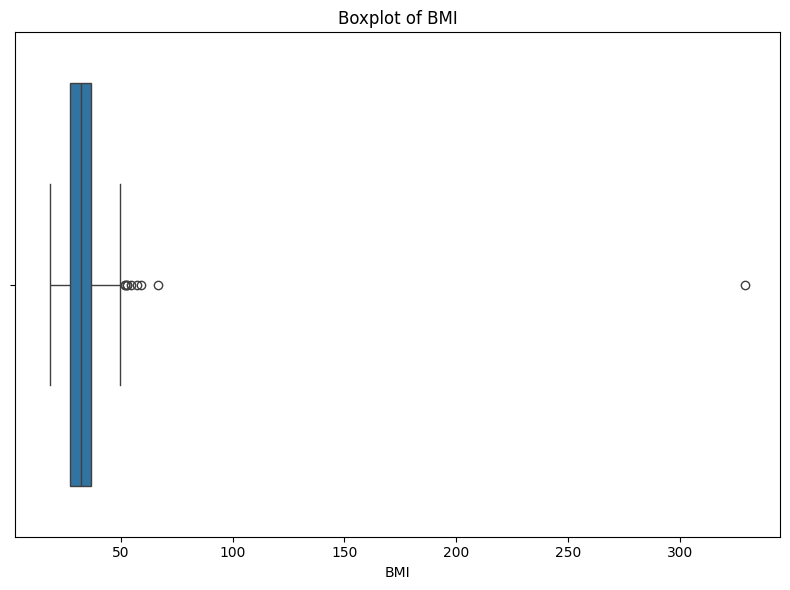

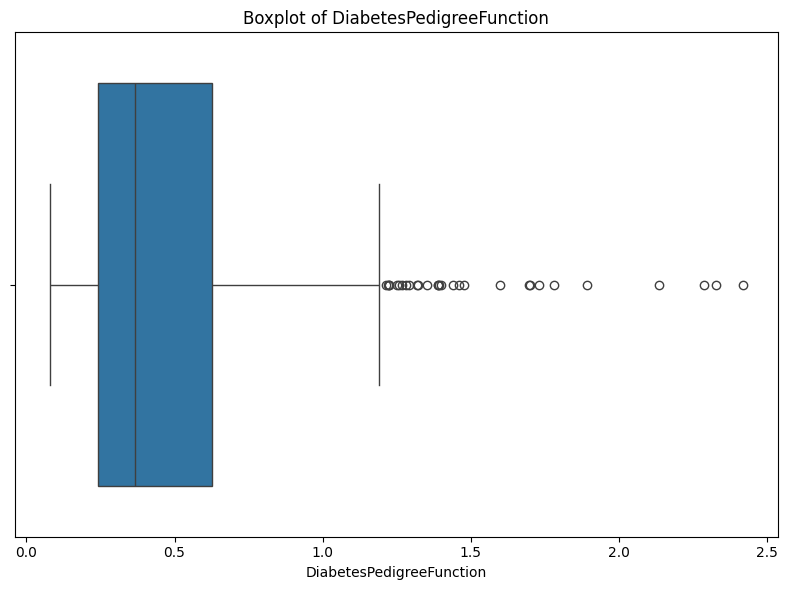

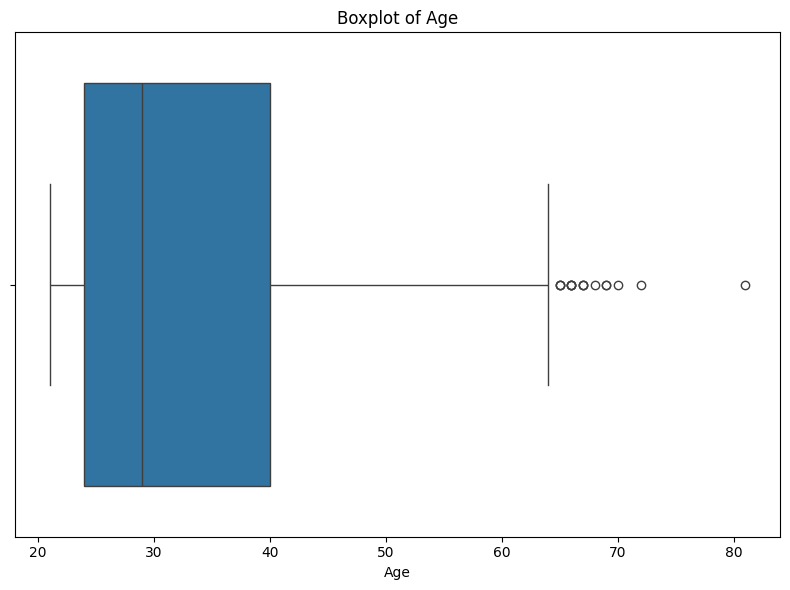

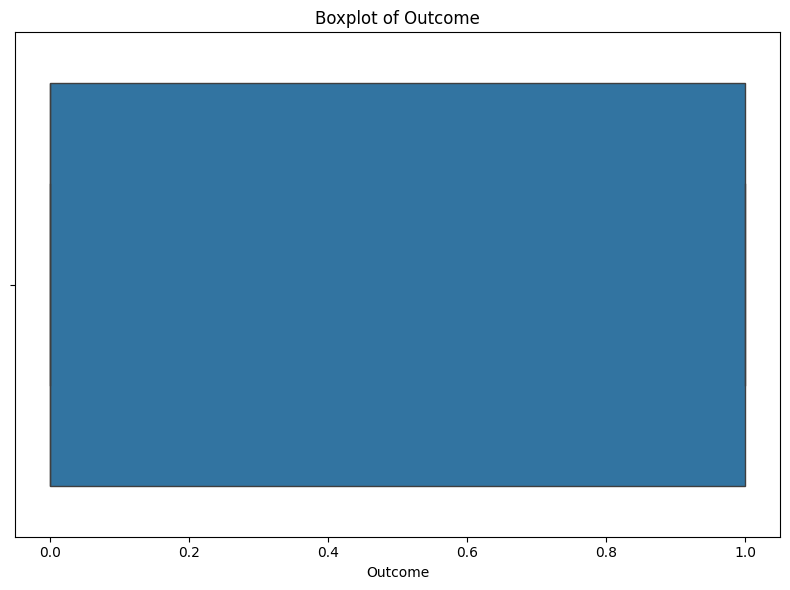

In [188]:
# Boxplot
for column in data_visualised_no_outlier.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_visualised_no_outlier[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Diabetes Distribution')

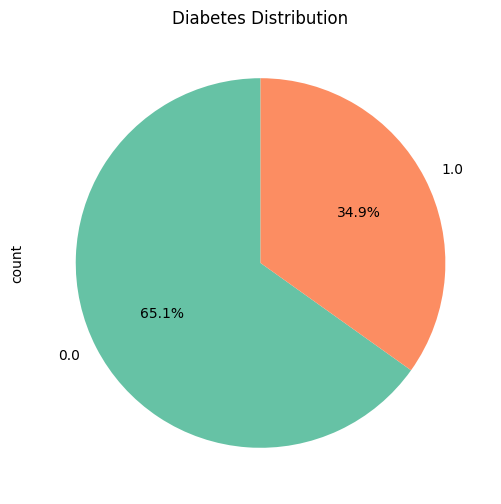

In [189]:
# Pie Chart for Outcome
plt.figure(figsize=(8, 6))
data_visualised_no_outlier['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Diabetes Distribution')

## Bivariate Analysis

In [ ]:
# Corelation Matrix
correlation_matrix = data_visualised_no_outlier.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')

In [ ]:
# Pairplot
sns.pairplot(data_visualised_no_outlier, hue='Outcome', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Diabetes Dataset', y=1.02)

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
for column in data_visualised_no_outlier_no_outcome.columns:
    sns.boxplot(x='Outcome', y=column, data=data_visualised_no_outlier)
    
    plt.title(f'{column} Distribution by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel({column})

    # Show the plot
    plt.tight_layout()
    plt.show()


## Multivariate Analysis

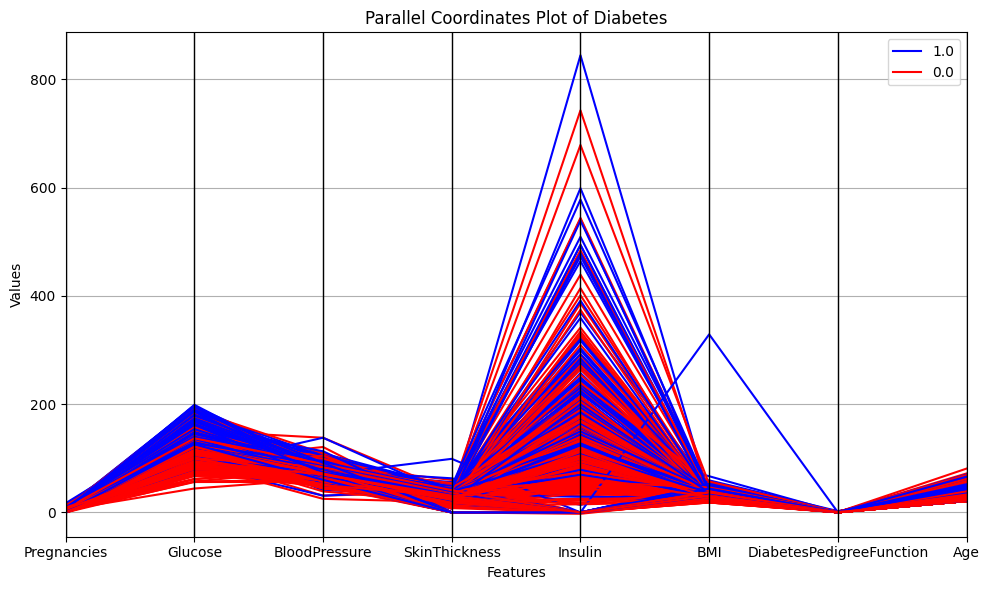

In [210]:
# Parallel Coordinate Plot
plt.figure(figsize=(10, 6))
parallel_coordinates(data_visualised_no_outlier, 'Outcome', color=['blue', 'red'])
plt.title('Parallel Coordinates Plot of Diabetes')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()
plt.show()


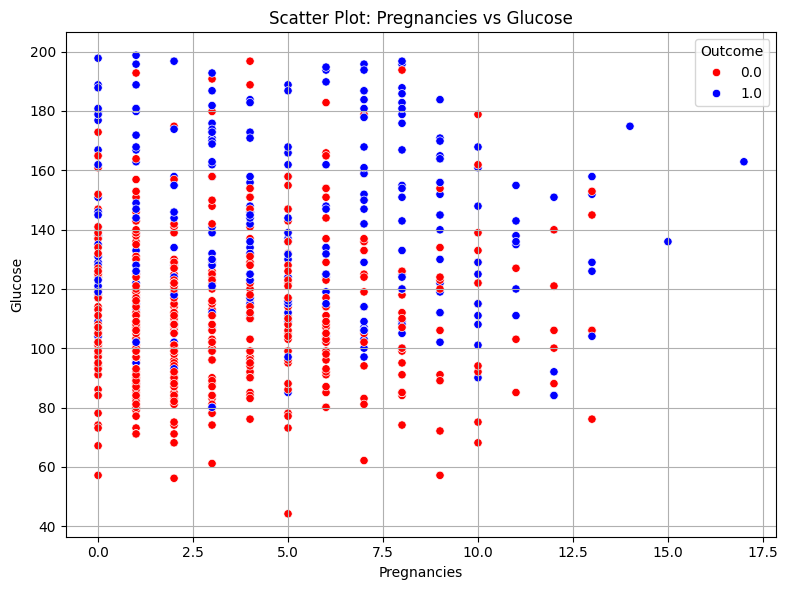

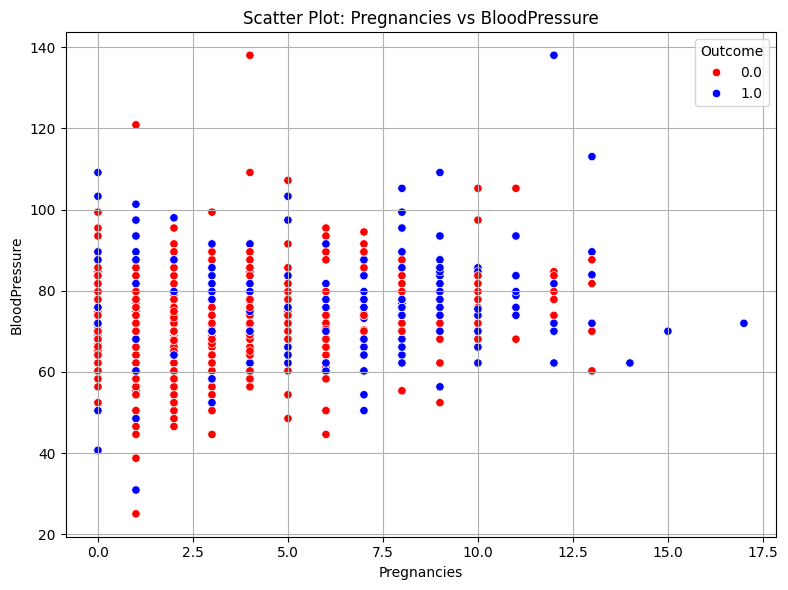

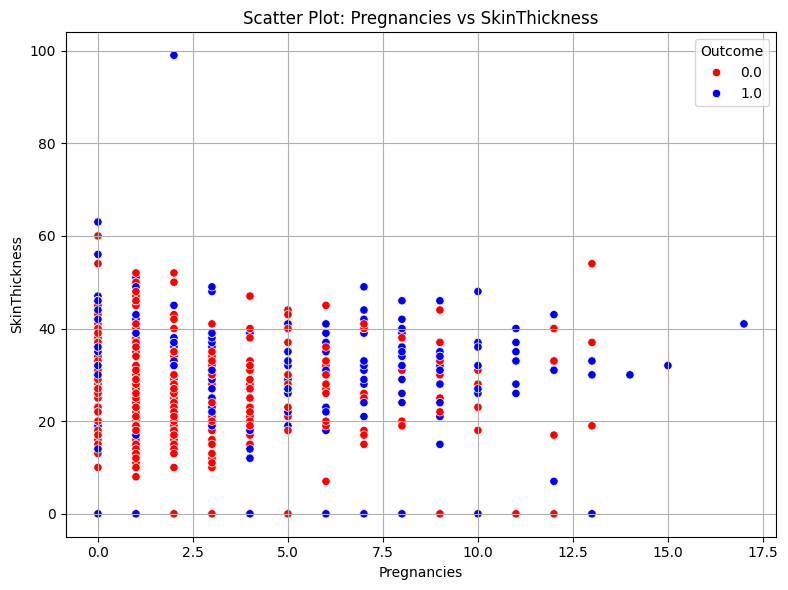

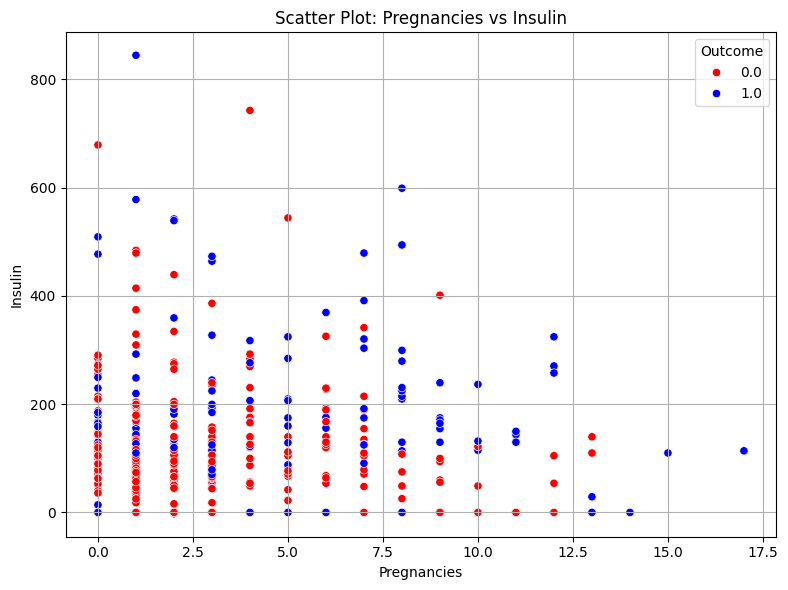

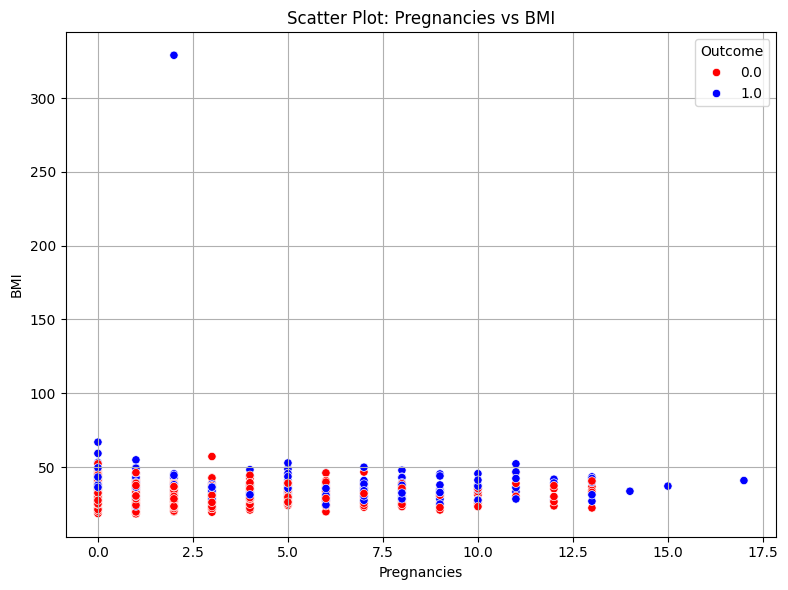

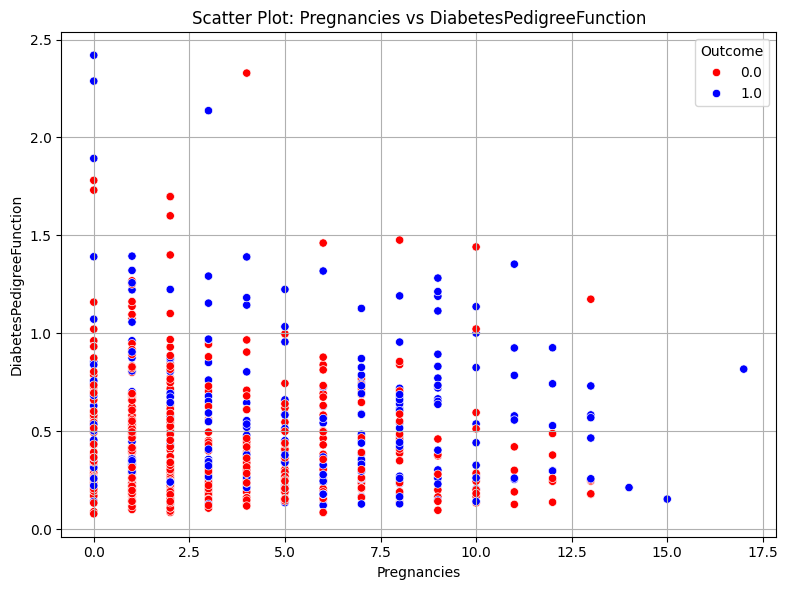

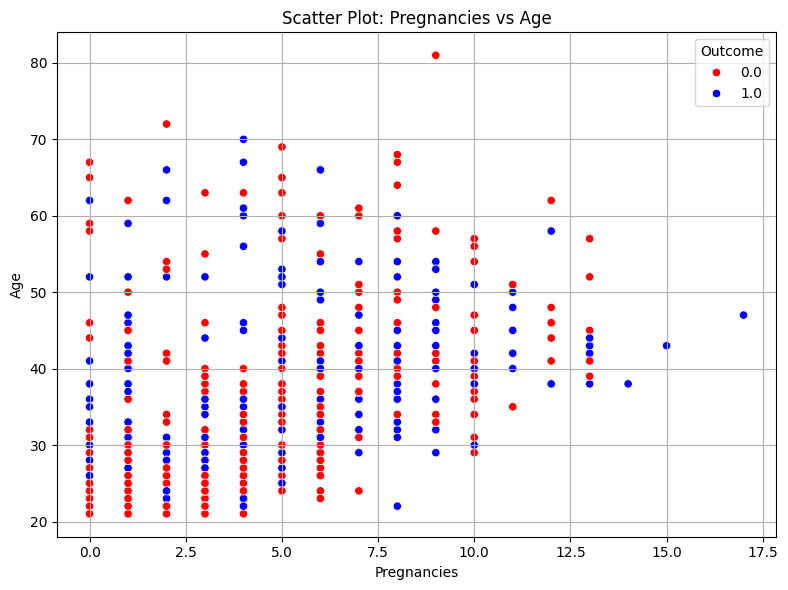

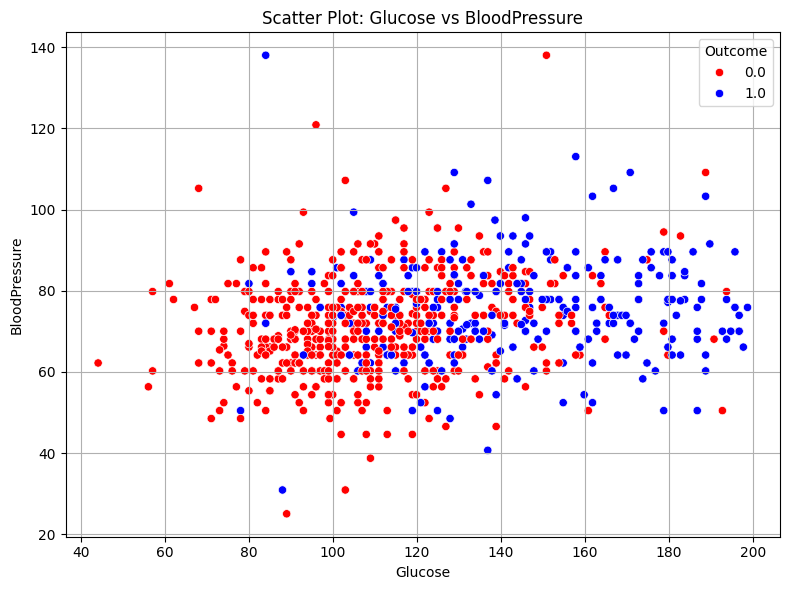

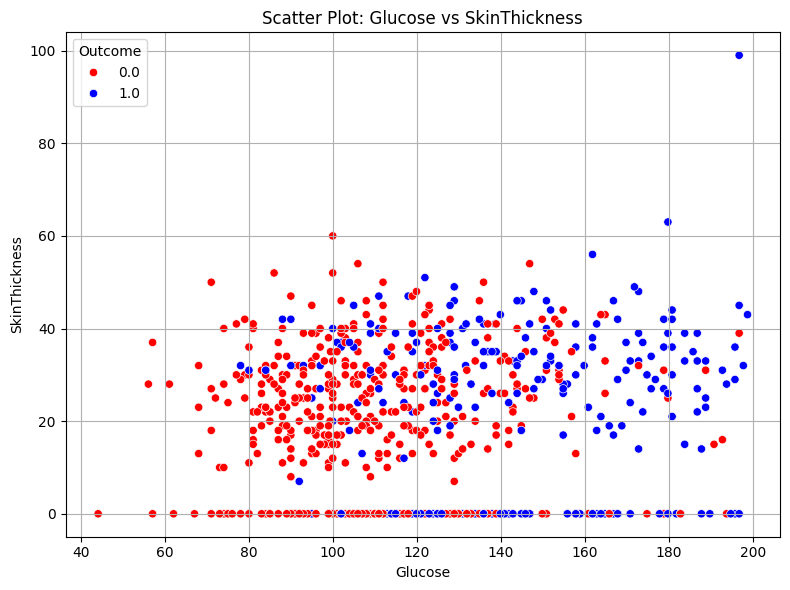

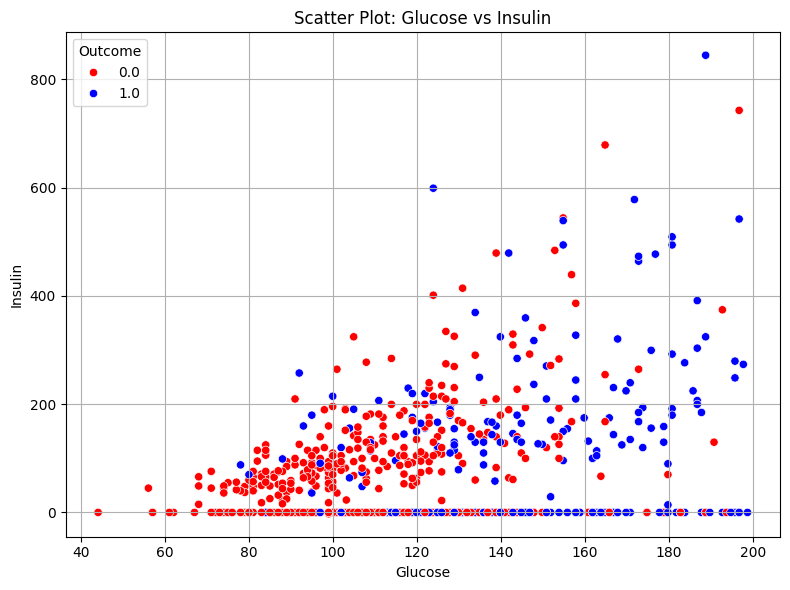

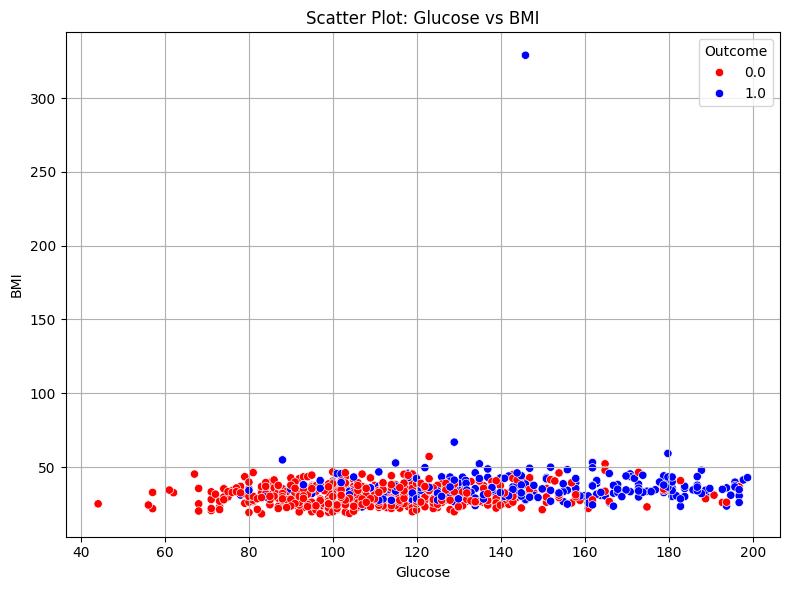

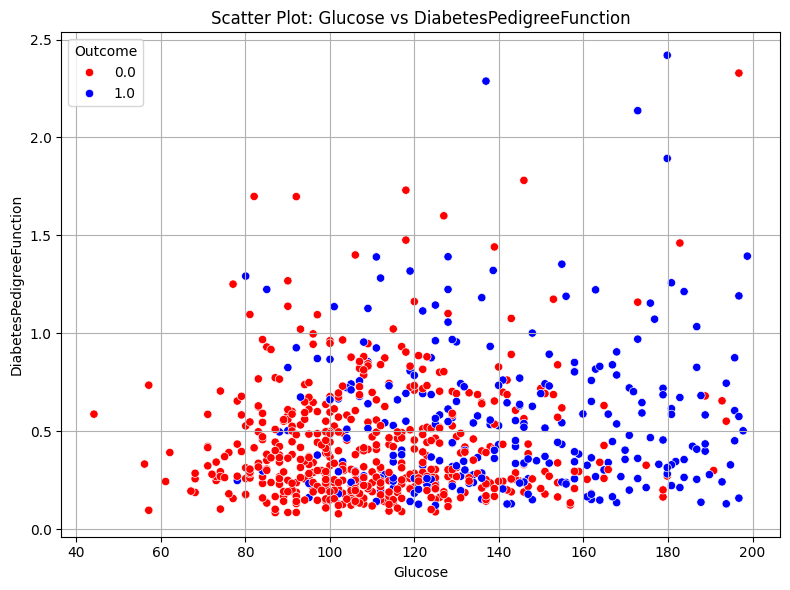

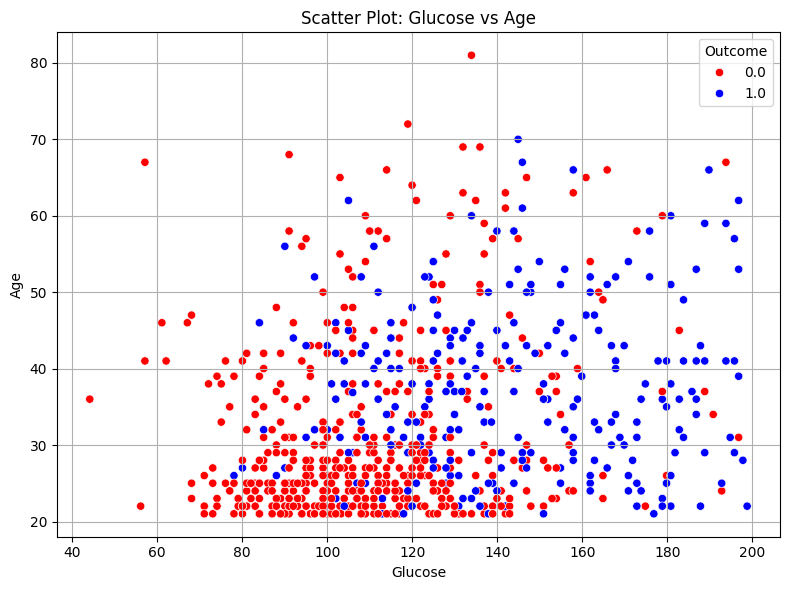

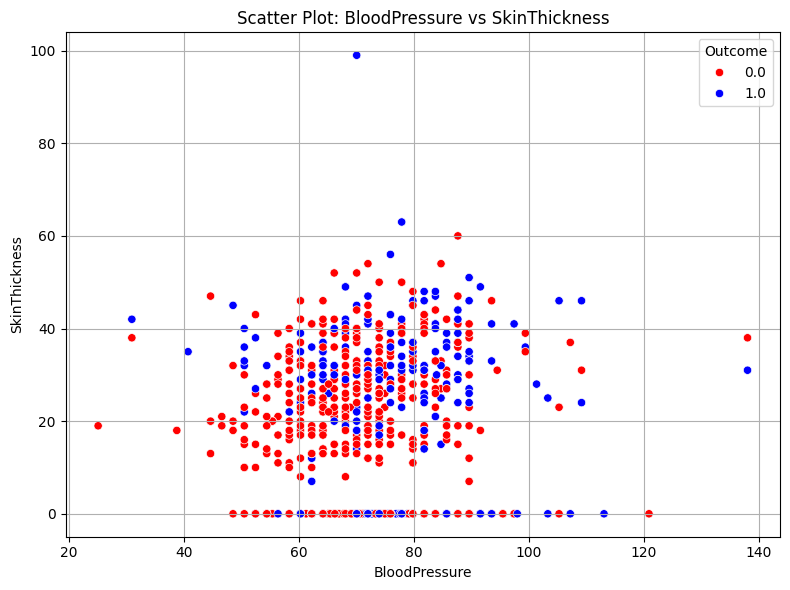

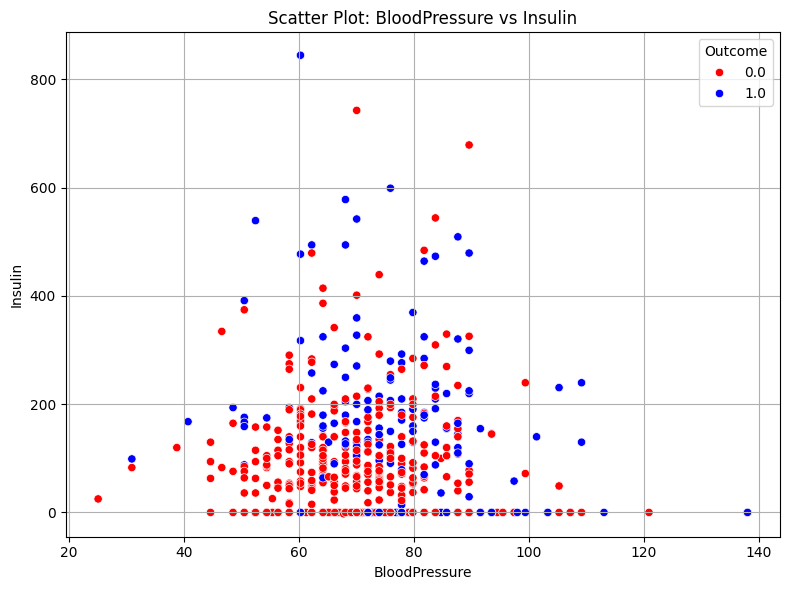

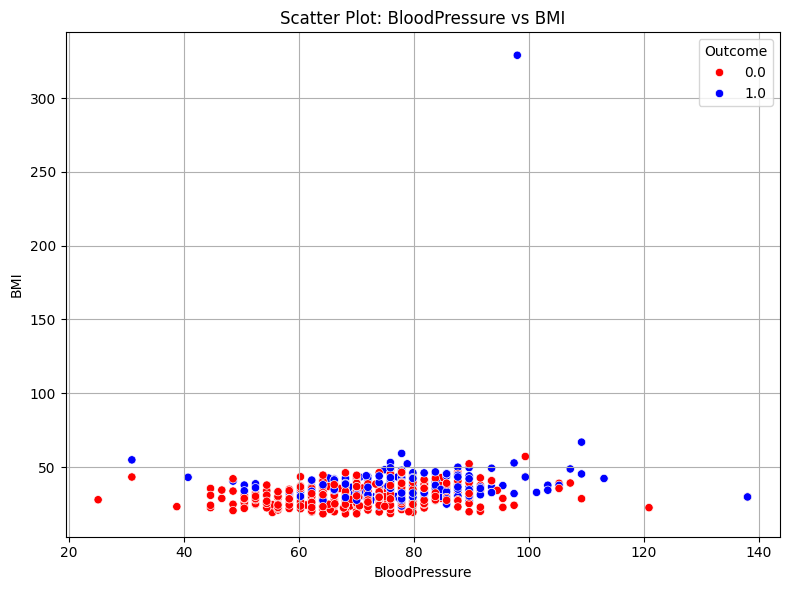

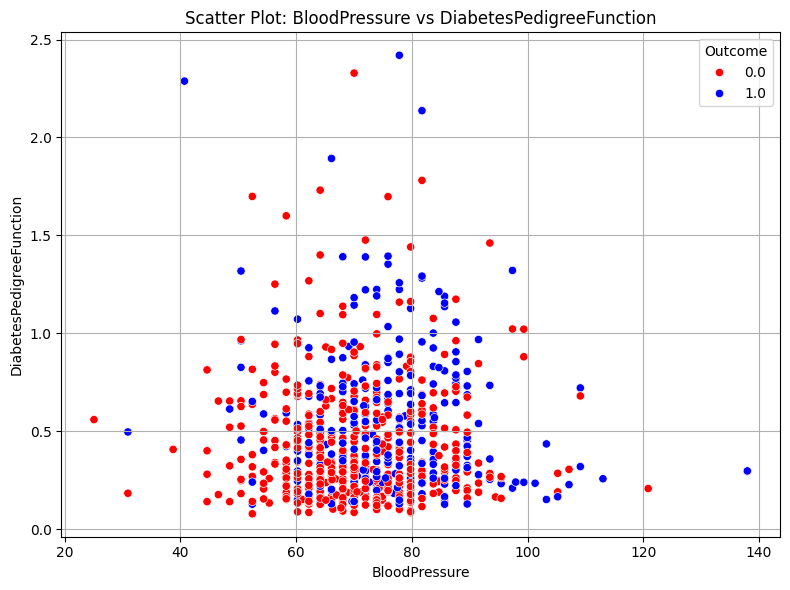

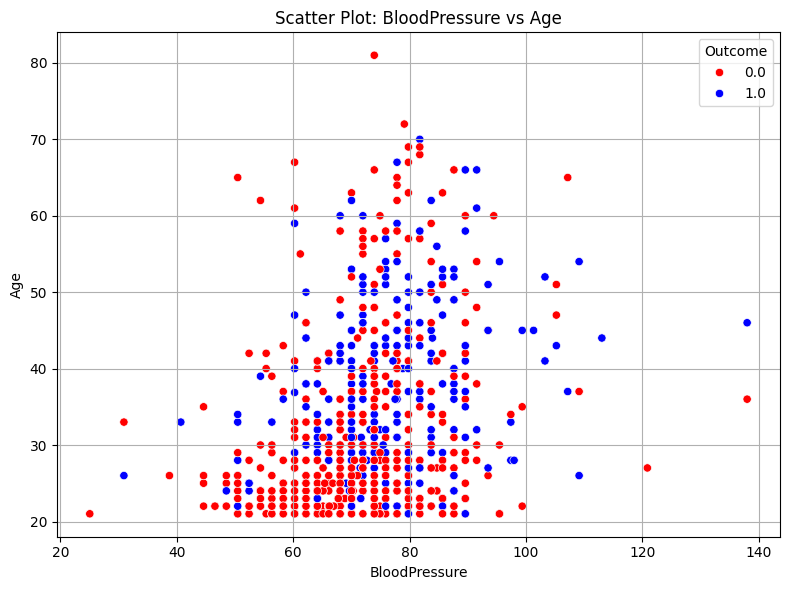

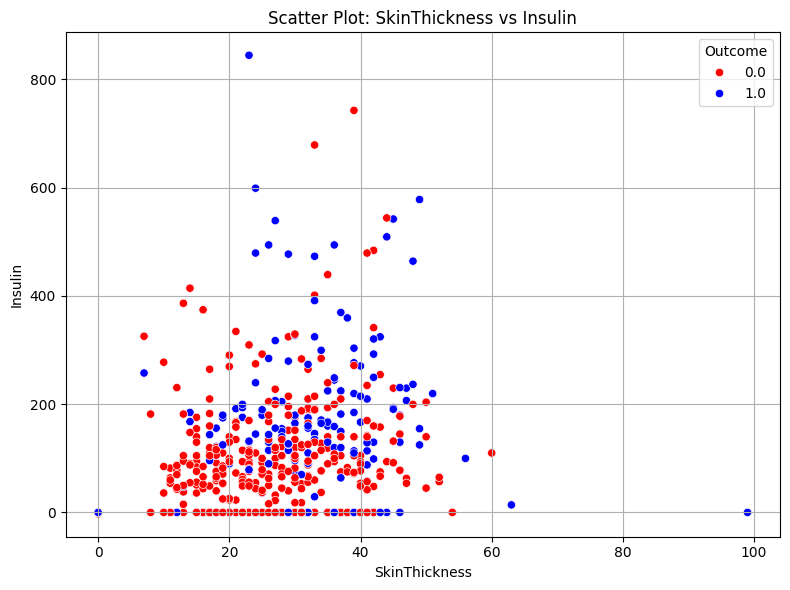

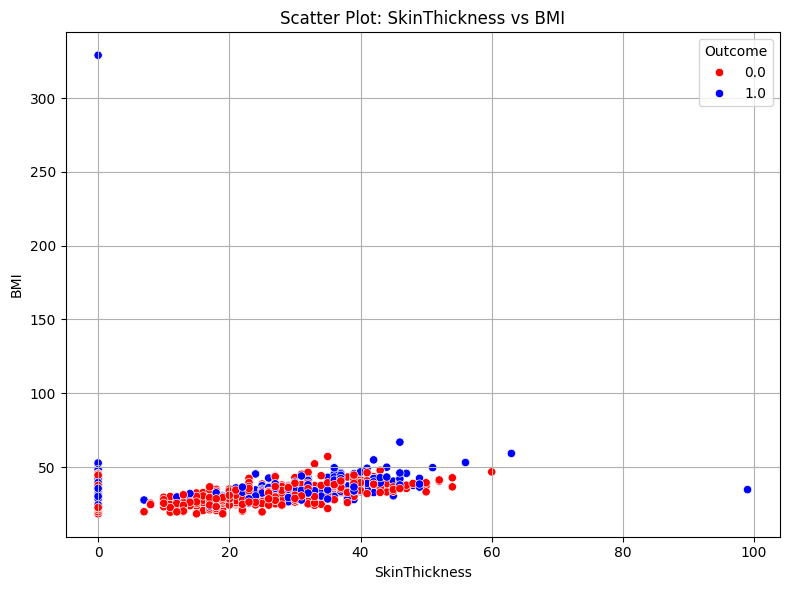

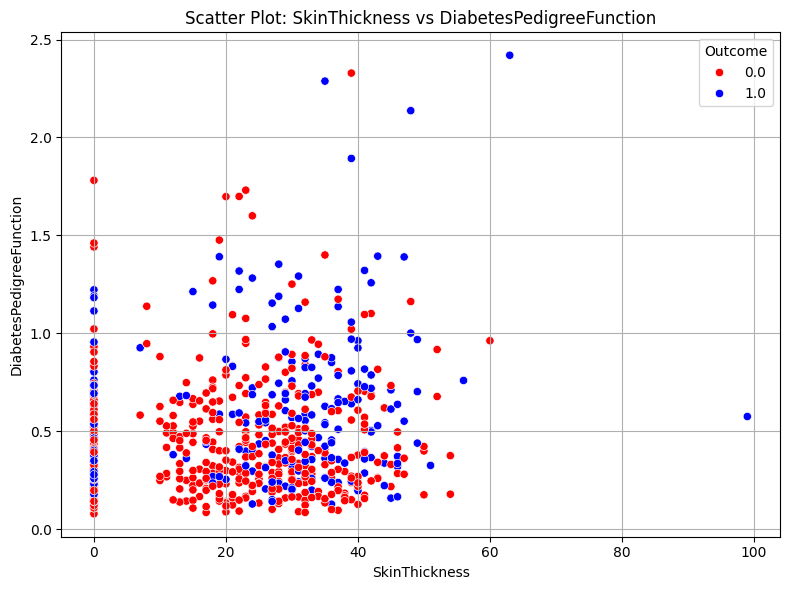

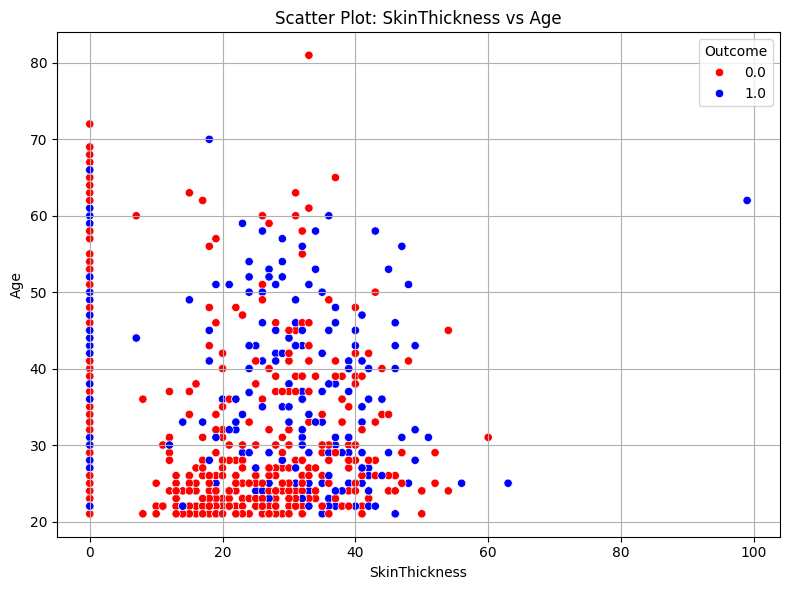

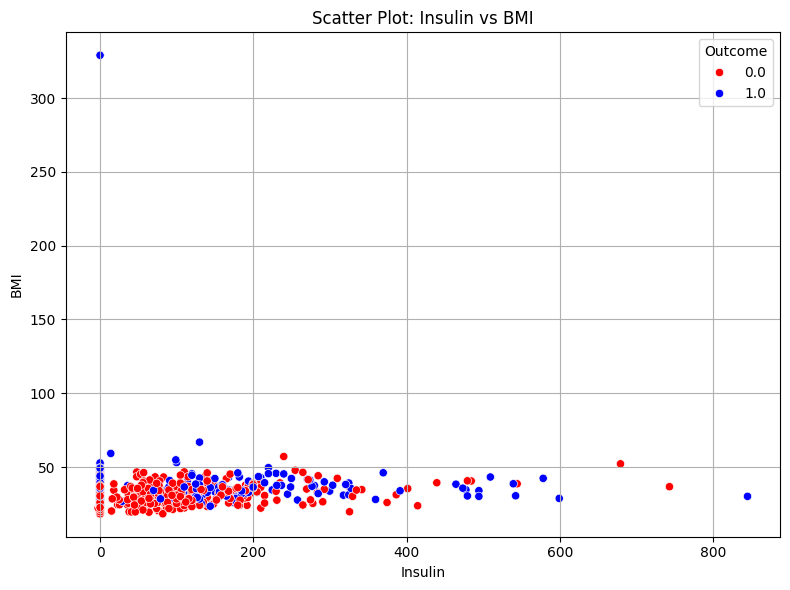

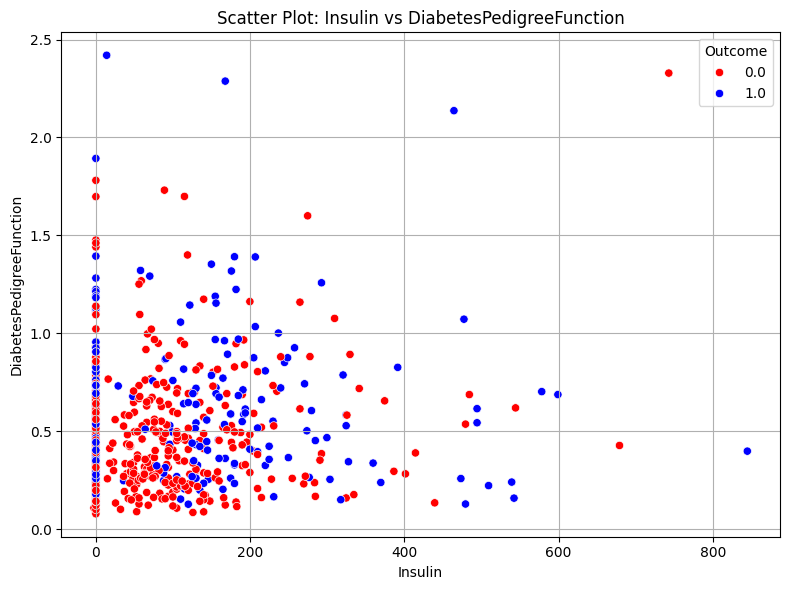

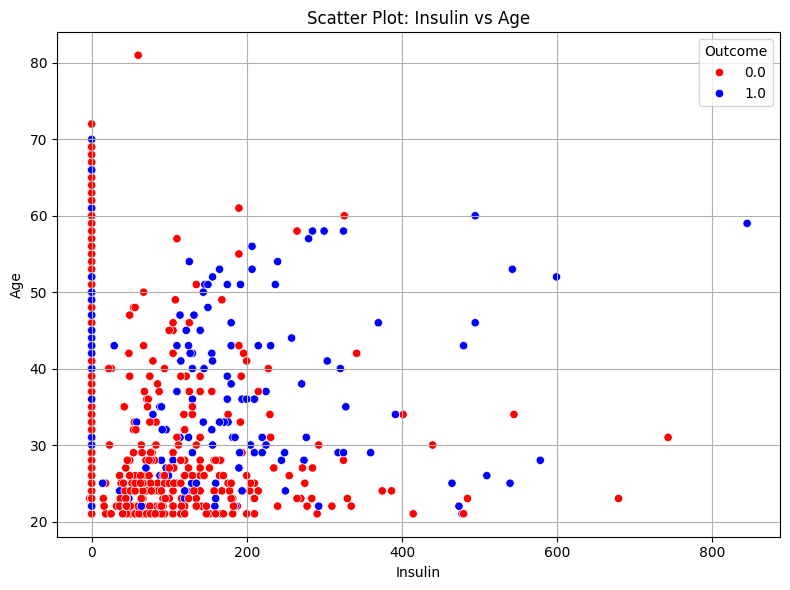

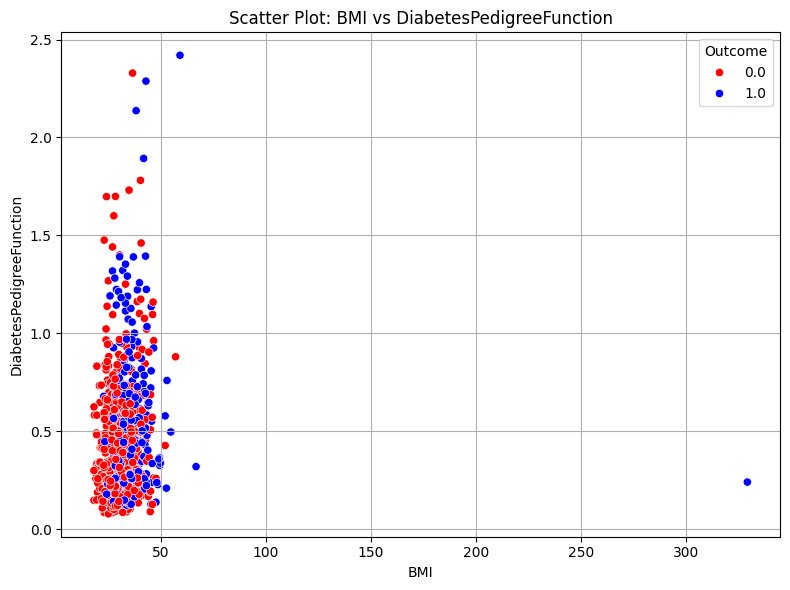

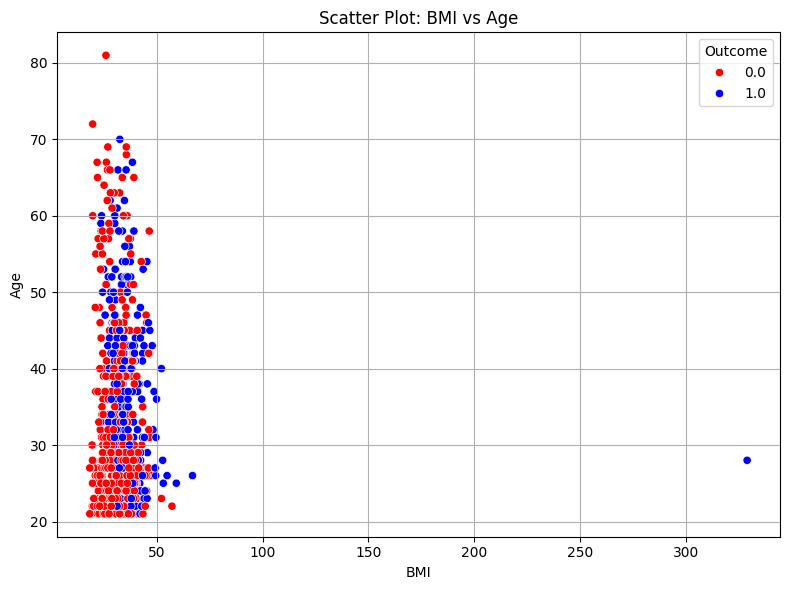

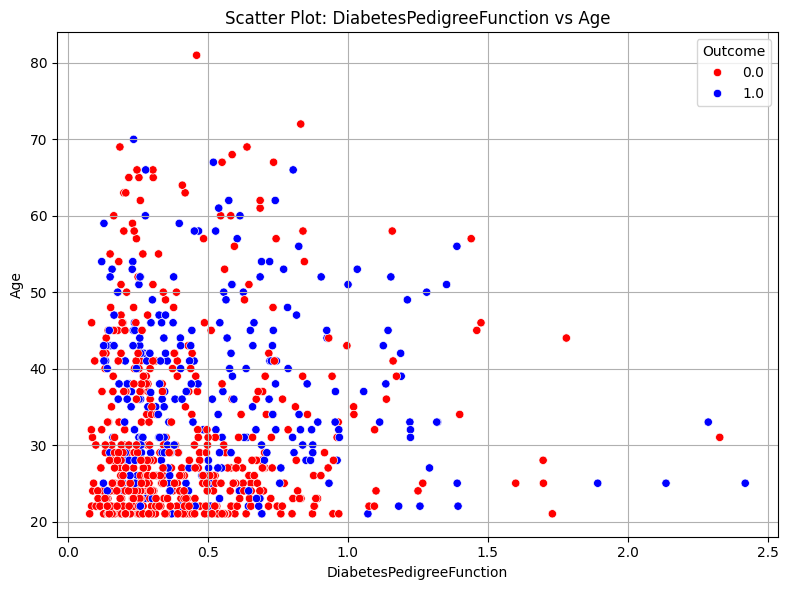

In [213]:
# PCA-Based Visualisation
import itertools

# List of the 8 features
features = data_visualised_no_outlier_no_outcome.columns

# Generate all unique pairs of features
feature_pairs = list(itertools.combinations(features, 2))

# Create scatter plots for each pair
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=data_visualised_no_outlier,
        x=x_feature,
        y=y_feature,
        hue='Outcome',
        palette={1: 'blue', 0: 'red'}
    )
    plt.title(f'Scatter Plot: {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
